# Investigating the Perception of Brazilian Software Developers on Data Privacy in the Use of Large Language Models (LLMs)

The objective of this research is to investigate the level of knowledge and understanding that Brazilian software developers have regarding data privacy when using Large Language Models (LLMs) in their professional activities.

Zenodo Repositories:
- English: https://zenodo.org/records/12538512}
- Portuguese: https://zenodo.org/records/12594274

### Research Questions (RQ):
- RQ1 - What is the level of knowledge of Brazilian software developers about basic data privacy concepts?
- RQ2 - What is the level of knowledge of Brazilian software developers about LLMs?
- RQ3 - What is the level of understanding of Brazilian software developers about the data privacy risks associated with the use of LLMs in their professional activities?
- RQ4 - What are the practices and procedures adopted by Brazilian software developers to mitigate data privacy risks when using LLMs in their professional activities?
- RQ5 - What are the challenges faced by Brazilian software developers in ensuring data privacy when using LLMs in their professional activities?
- RQ6 - What are the recommendations for ensuring data privacy when using LLMs?



## Imports and General Settings

Importing Python packages and General Settings for these packages to the Notebook

In [1]:
import pandas as pd  # Imports the pandas library for data manipulation
from tabulate import tabulate  # Imports the tabulate library for table formatting
import matplotlib.pyplot as plt

In [2]:
# Googletrans is a free and unlimited python library that implements the Google Translate API.
# Documentation: https://py-googletrans.readthedocs.io/en/latest/

# To install the specific version of googletrans:
# !pip install -q -U googletrans==3.1.0a0 

from googletrans import Translator

# Use Example

# Create a Translator object
# translator = Translator()

# Translate a text from Portuguese to English
# translation = translator.translate('1. Qual a sua idade?', src='pt', dest='en')
# Print the translated text
# translation.text

In [3]:
# Setting the option to display the full content of each column's values without truncation
pd.set_option('display.max_colwidth', None)

In [4]:
# Reload the watermark extension
%reload_ext watermark

# Display the author name and versions of the imported libraries
%watermark -a "Fabiano Falcao" --iversions

Author: Fabiano Falcao

pandas    : 1.5.3
matplotlib: 3.7.1



## Python Functions
Python functions to handle the results of similar queries

In [5]:
def process_multiple_option_column(df, column_name):
    """
    Processes a DataFrame column containing multiple options separated by semicolons and 
    returns a DataFrame with the count and percentage of each unique option.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    column_name (str): The name of the column to process.

    Returns:
    pandas.DataFrame: A DataFrame with three columns:
        - 'answer': The unique options found in the column.
        - 'qtde': The count of each option.
        - 'pct': The percentage of the total count for each option.
    """    
    # Creating a DataFrame with the specified column
    question_sts = df[column_name].to_frame()

    # Creating a dictionary to store the counts
    answers_count = {}
    for row in question_sts.values:
        # Splitting the cell content by ';' to get individual answers
        answers_selected = row[0].split(';')
        for answer in answers_selected:
            answer = answer.strip()  # Removing leading/trailing spaces
            if answer in answers_count:
                answers_count[answer] += 1  # Incrementing the count if the answer is already in the dictionary
            else:
                answers_count[answer] = 1  # Adding the answer to the dictionary if not present

    # Converting the dictionary to a DataFrame
    df_answers = pd.DataFrame.from_dict(answers_count, orient='index', columns=['qtde'])
    df_answers.index.names = ['answer']  # Renaming the index to 'answer'
    df_answers = df_answers.reset_index()  # Converting the index to a column

    # Calculating the percentage of each answer
    df_answers['pct'] = ((df_answers['qtde'] / df.shape[0]) * 100).round(1)

    return df_answers

In [6]:
def process_level_knowledge_column(df, column_name):
    """
    Processes a DataFrame column containing levels of knowledge and returns a DataFrame with 
    the count, percentage, and English translations of each unique level.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    column_name (str): The name of the column to process.

    Returns:
    pandas.DataFrame: A DataFrame with three columns:
        - 'question_anwser': The unique knowledge levels found in the column.
        - 'qtde': The count of each knowledge level.
        - 'pct': The percentage of the total count for each knowledge level.
    """
    # Counting the occurrences of each unique value in the specified column
    question_sts = df[column_name].value_counts().to_frame()

    # Resetting the index to convert the index to a column
    question_sts = question_sts.reset_index(drop=False)
    question_sts = question_sts.rename(columns={'index': 'question_anwser'})
    question_sts.rename(columns={column_name: 'qtde'}, inplace=True)

    # Splitting the 'question_anwser' column to remove any text in parentheses and stripping spaces
    question_sts["question_anwser"] = question_sts["question_anwser"].str.split('(', expand=True)[0].str.strip()

    # Creating a dictionary to map knowledge levels to numerical values
    mapping_dict = {'Sem conhecimento': 1,
                    'Noções básicas': 2,
                    'Conhecimento básico': 3,
                    'Conhecimento bom': 4,
                    'Conhecimento completo': 5}

    # Creating the new column 'ord_question_anwser' based on the mapping dictionary
    question_sts['ord_question_anwser'] = question_sts['question_anwser'].map(mapping_dict)

    # Sorting the DataFrame by 'ord_question_anwser' in ascending order and dropping the column
    question_sts = question_sts.sort_values(by='ord_question_anwser', ascending=True)
    question_sts.drop('ord_question_anwser', axis=1, inplace=True)
    question_sts = question_sts.reset_index(drop=True)

    # Calculating the percentage of each knowledge level
    question_sts['pct'] = ((question_sts['qtde'] / df.shape[0]) * 100).round(1)

    # Creating a dictionary for translation
    translation_dict = {
        'Sem conhecimento': 'No knowledge',
        'Noções básicas': 'Basic Awareness',
        'Conhecimento básico': 'Basic Knowledge',
        'Conhecimento bom': 'Intermediate Knowledge',
        'Conhecimento completo': 'Comprehensive Knowledge'
    }

    # Updating the column with the translated values
    question_sts['question_anwser'] = question_sts['question_anwser'].map(translation_dict)

    return question_sts

## Dataframe

Importing the CSV file of the questionnaire results and basic verification of its content.

In [7]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('QUESTIONÁRIO ONLINE: Investigando a Percepção dos Desenvolvedores Brasileiros de Software  sobre Privacidade de Dados no uso de  LLMs.csv')

In [8]:
# Retrieving the shape of the DataFrame to get the number of rows and columns
df.shape

(74, 44)

In [9]:
# Retrieving the column names of the DataFrame
df.columns

Index(['Carimbo de data/hora', 'Você concorda em participar desta pesquisa?',
       '1. Qual a sua idade?', '2. Em qual Estado você mora?',
       '3. Qual seu nível de escolaridade?',
       '4. Qual é a sua principal função atualmente na área de desenvolvimento de software?',
       '5. Quantos anos de experiência você tem trabalhando em desenvolvimento de software?',
       '6. Qual seu nível de conhecimento sobre privacidade de dados?',
       '7. Você já participou de treinamentos ou cursos sobre privacidade de dados? ',
       '8. Qual sua principal fonte de informação sobre privacidade de dados? ',
       '9.  Qual seu nível de conhecimento sobre a Lei Geral de Proteção de Dados (LGPD)? ',
       '10. Qual seu nível de conhecimento sobre os princípios da Lei Geral de Proteção de Dados (LGPD)? ',
       '11. Quais são os principais princípios da LGPD que você conhece? (Marque todas as opções que se aplicam)',
       '12. Quais dos seguintes conceitos de proteção de dados da LGPD

## Participant Profile

### Q01 - How old are you?
- 20 years or younger
- Between 21 and 25 years
- Between 26 and 30 years
- Between 31 and 36 years
- Between 37 and 42 years
- Between 43 and 47 years
- Between 48 and 54 years
- Between 55 and 60 years
- 61 years or older
- I prefer not to answer

In [10]:
idade_sts = df['1. Qual a sua idade?'].value_counts().to_frame()

# Sorting the index in ascending order
idade_sts = idade_sts.sort_index(ascending=True)

# Resetting the index to convert the index to a column
idade_sts = idade_sts.reset_index(drop=False)

# Renaming the column 'index' to 'FaixaEtaria'
idade_sts = idade_sts.rename(columns={'index': 'FaixaEtaria'})

# Creating a dictionary to map age ranges to numerical values
dicionario_mapeamento = {'Entre 26 e 30 anos': 1,
                         'Entre 31 e 36 anos': 2,
                         'Entre 37 e 42 anos': 3,
                         'Entre 43 e 47 anos': 4,
                         'Entre 48 e 54 anos': 5,
                         'Entre 55 a 60 anos': 6}

# Creating a new column 'ord_faixa_etaria' for subsequent sorting
idade_sts['ord_faixa_etaria'] = idade_sts['FaixaEtaria'].map(dicionario_mapeamento)

# Sorting the DataFrame by 'ord_faixa_etaria' in ascending order
idade_sts = idade_sts.sort_values(by='ord_faixa_etaria', ascending=True)

# Dropping the 'ord_faixa_etaria' column
idade_sts.drop('ord_faixa_etaria', axis=1, inplace=True)

# Resetting the index and dropping the previous index
idade_sts = idade_sts.reset_index(drop=True)

# Renaming the column '1. Qual a sua idade?' to 'qtde'
idade_sts.rename(columns={'1. Qual a sua idade?': 'qtde'}, inplace=True)

# Calculating the percentage of each age group
idade_sts['pct'] = ((idade_sts['qtde'] / df.shape[0]) * 100).round(1)

# Replacing long age range labels with shorter ones
idade_sts['FaixaEtaria'] = idade_sts['FaixaEtaria'].replace(["Entre 26 e 30 anos", 
                                                             "Entre 31 e 36 anos",
                                                             "Entre 37 e 42 anos",
                                                             "Entre 43 e 47 anos",
                                                             "Entre 48 e 54 anos",
                                                             "Entre 55 a 60 anos"],
                                                            ["26 - 30",
                                                             "31 - 36",
                                                             "37 - 42",
                                                             "43 - 47",
                                                             "48 - 54",
                                                             "55 - 60"])

#idade_sts

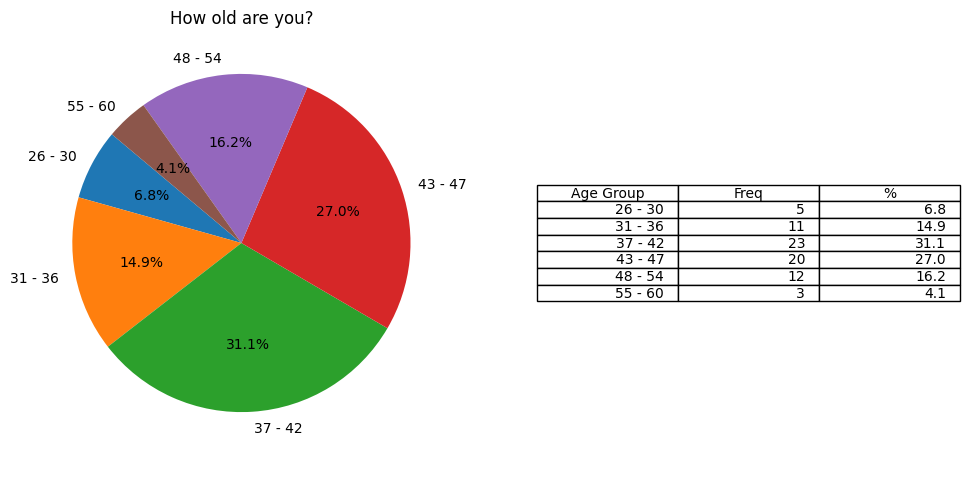

In [11]:
# DataFrame data from idade_sts
labels = idade_sts['FaixaEtaria']
sizes = idade_sts['qtde']

# Creating the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('How old are you?')

# Table
table_data = idade_sts[['FaixaEtaria', 'qtde', 'pct']]
table_data.rename(columns={"FaixaEtaria": "Age Group", "qtde": "Freq", "pct": "%"}, inplace=True)
ax2.axis('off')  # Hides the borders of the table
ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')

plt.show()

In [12]:
# Creating a LaTeX table using the `tabulate` package
latex_table_q1 = tabulate(idade_sts, floatfmt=".1f", tablefmt="latex", showindex="False")

# Printing the LaTeX table
print(latex_table_q1)

\begin{tabular}{lrr}
\hline
 26 - 30 &  5 &  6.8 \\
 31 - 36 & 11 & 14.9 \\
 37 - 42 & 23 & 31.1 \\
 43 - 47 & 20 & 27.0 \\
 48 - 54 & 12 & 16.2 \\
 55 - 60 &  3 &  4.1 \\
\hline
\end{tabular}


### Q02 - Which Brazilian state do you live in?
- AC
- AL
- AP
- AM
- BA
- CE
- DF
- ES
- GO
- MA
- MT
- MS
- MG
- PA
- PB
- PR
- PE
- PI
- RJ
- RN
- RS
- RO
- RR
- SC
- SP
- SE
- TO
- None (I live outside Brazil)

In [13]:
#estados_regiao = {
#    "AC": "Norte",
#    "AL": "Nordeste",
#    "AM": "Norte",
#    "AP": "Norte",
#    "BA": "Nordeste",
#    "CE": "Nordeste",
#    "DF": "Centro-Oeste",
#    "ES": "Sudeste",
#    "GO": "Centro-Oeste",
#    "MA": "Nordeste",
#    "MG": "Sudeste",
#    "MS": "Centro-Oeste",
#    "MT": "Centro-Oeste",
#    "PA": "Norte",
#    "PB": "Nordeste",
#    "PE": "Nordeste",
#    "PI": "Nordeste",
#    "PR": "Sul",
#    "RJ": "Sudeste",
#    "RN": "Nordeste",
#    "RS": "Sul",
#    "RO": "Norte",
#    "RR": "Norte",
#    "SC": "Sul",
#    "SE": "Nordeste",
#    "SP": "Sudeste",
#    "TO": "Norte",
#    "Nenhum (moro fora do Brasil)":"Exterior"
#}

#estado_moradia_sts['regiao_brasil'] = estado_moradia_sts['regiao_brasil'].replace(["Centro-Oeste", 
#                                                                         "Exterior",
#                                                                         "Nordeste",
#                                                                         "Norte",
#                                                                         "Sudeste",
#                                                                         "Sul"],
#                                                                         ["Midwest",
#                                                                          "Abroad",
#                                                                          "Northeast",
#                                                                          "North",
#                                                                          "Southeast",
#                                                                          "South"])

In [14]:
# Mapping of Brazilian states to regions
estados_regiao = {
    "AC": "North",
    "AL": "Northeast",
    "AM": "North",
    "AP": "North",
    "BA": "Northeast",
    "CE": "Northeast",
    "DF": "MidWest",
    "ES": "Southeast",
    "GO": "MidWest",
    "MA": "Northeast",
    "MG": "Southeast",
    "MS": "MidWest",
    "MT": "MidWest",
    "PA": "North",
    "PB": "Northeast",
    "PE": "Northeast",
    "PI": "Northeast",
    "PR": "South",
    "RJ": "Southeast",
    "RN": "Northeast",
    "RS": "South",
    "RO": "North",
    "RR": "North",
    "SC": "South",
    "SE": "Northeast",
    "SP": "Southeast",
    "TO": "North",
    "Nenhum (moro fora do Brasil)": "Abroad"
}

In [15]:
# Creating a DataFrame with the column "2. Em qual Estado você mora?"
estado_moradia = df["2. Em qual Estado você mora?"].to_frame()

# Mapping states to regions using the 'estados_regiao' dictionary
estado_moradia["Região"] = estado_moradia['2. Em qual Estado você mora?'].map(estados_regiao)

# Counting the occurrences of each region
estado_moradia_sts = estado_moradia["Região"].value_counts().to_frame()

# Resetting the index to convert the index to a column
estado_moradia_sts = estado_moradia_sts.reset_index(drop=False)
estado_moradia_sts = estado_moradia_sts.rename(columns={'index': 'regiao_brasil','Região':'qtde'})

# Calculating the percentage of each region
estado_moradia_sts['pct'] = ((estado_moradia_sts['qtde']/df.shape[0])*100).round(1)

# Creating a dictionary to map regions to numerical values
mapping_dict = {'North': 1,
                'Northeast': 2,
                'MidWest': 3,
                'Southeast': 4,
                "South": 5,
                "Abroad": 6}

# Creating a new column 'ord_regiao' based on the mapping dictionary for sorting
estado_moradia_sts['ord_regiao'] = estado_moradia_sts['regiao_brasil'].map(mapping_dict)

# Sorting the DataFrame by 'ord_regiao' in ascending order and dropping the column
estado_moradia_sts = estado_moradia_sts.sort_values(by='ord_regiao', ascending=True)
estado_moradia_sts.drop('ord_regiao', axis=1, inplace=True)
estado_moradia_sts = estado_moradia_sts.reset_index(drop=True)

# Returning the DataFrame with state region statistics
# estado_moradia_sts

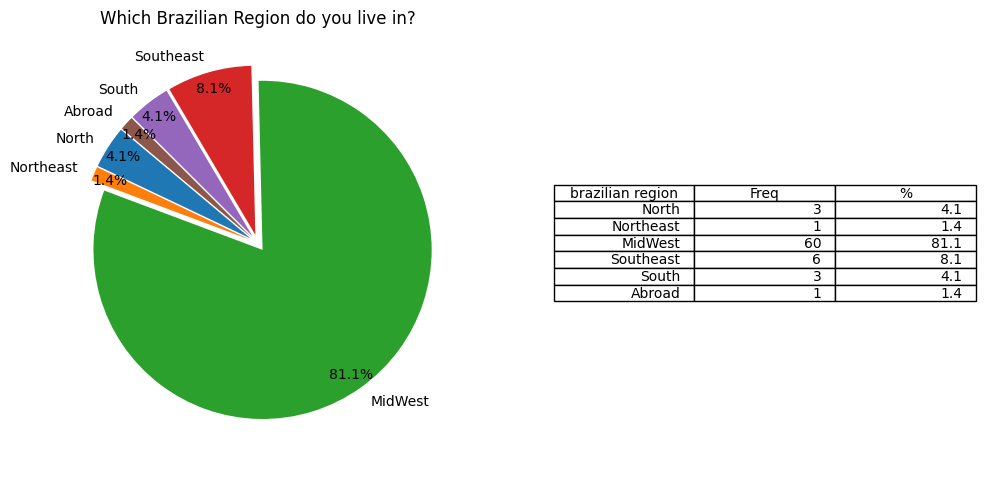

In [16]:
# DataFrame data from idade_sts
labels = estado_moradia_sts['regiao_brasil']
sizes = estado_moradia_sts['qtde']

# Creating the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,explode = [0.05]*6,pctdistance=0.9)
ax1.set_title('Which Brazilian Region do you live in?')

# Table
table_data = estado_moradia_sts[['regiao_brasil', 'qtde', 'pct']]
table_data.rename(columns={"regiao_brasil": "brazilian region", "qtde": "Freq", "pct": "%"}, inplace=True)
ax2.axis('off')  # Hides the borders of the table
ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')

plt.show()

In [17]:
# Creating a LaTeX table using the `tabulate` package
tabela_latex_q2 = tabulate(estado_moradia_sts, floatfmt=".1f", tablefmt="latex", showindex="False")

# Printing the LaTeX table
print(tabela_latex_q2)

\begin{tabular}{lrr}
\hline
 North     &  3 &  4.1 \\
 Northeast &  1 &  1.4 \\
 MidWest   & 60 & 81.1 \\
 Southeast &  6 &  8.1 \\
 South     &  3 &  4.1 \\
 Abroad    &  1 &  1.4 \\
\hline
\end{tabular}


### Q03 - What is your level of education?
- High school
- Graduate
- Postgraduate degree (Specialization) or MBA
- Master's degree
- Doctorate

In [18]:
# Counting the occurrences of each education level in the specified column and converting to a DataFrame
nivel_escolaridade_sts = df["3. Qual seu nível de escolaridade?"].value_counts().to_frame()

# Resetting the index to convert the index to a column and renaming columns
nivel_escolaridade_sts = nivel_escolaridade_sts.reset_index(drop=False)
nivel_escolaridade_sts = nivel_escolaridade_sts.rename(columns={'index': 'Escolaridade'})

# Creating a dictionary to map education levels to numerical values
mapping_dict = {'Graduado': 1,
                'Pós-graduação Lato Sensu (Especialização) ou MBA': 2,
                'Mestrado': 3,
                'Doutorado': 4}

# Creating a new column 'ord_escolaridade' based on the mapping dictionary for sorting purposes
nivel_escolaridade_sts['ord_escolaridade'] = nivel_escolaridade_sts['Escolaridade'].map(mapping_dict)

# Sorting the DataFrame by 'ord_escolaridade' in ascending order and dropping the column
nivel_escolaridade_sts = nivel_escolaridade_sts.sort_values(by='ord_escolaridade', ascending=True)
nivel_escolaridade_sts.drop('ord_escolaridade', axis=1, inplace=True)
nivel_escolaridade_sts = nivel_escolaridade_sts.reset_index(drop=True)

# Renaming the column '3. Qual seu nível de escolaridade?' to 'qtde' and calculating the percentage
nivel_escolaridade_sts.rename(columns={'3. Qual seu nível de escolaridade?': 'qtde'}, inplace=True)
nivel_escolaridade_sts['pct'] = ((nivel_escolaridade_sts['qtde']/df.shape[0])*100).round(1)

# Translating the 'Escolaridade' column values to English
nivel_escolaridade_sts['Escolaridade'] = nivel_escolaridade_sts['Escolaridade'].replace(["Graduado", 
                                                                         "Pós-graduação Lato Sensu (Especialização) ou MBA",
                                                                         "Mestrado",
                                                                         "Doutorado"],
                                                                         ["Graduated",
                                                                          "Specialist",
                                                                          "Master",
                                                                          "PhD"])
#nivel_escolaridade_sts

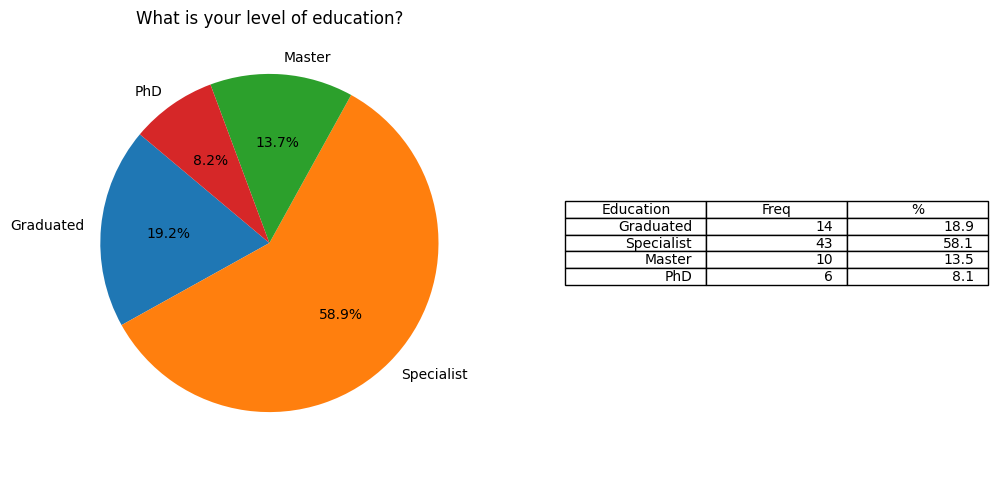

In [19]:
# DataFrame data from idade_sts
labels = nivel_escolaridade_sts['Escolaridade']
sizes = nivel_escolaridade_sts['qtde']

# Creating the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('What is your level of education?')

# Table
table_data = nivel_escolaridade_sts[['Escolaridade', 'qtde', 'pct']]
table_data.rename(columns={"Escolaridade": "Education", "qtde": "Freq", "pct": "%"}, inplace=True)
ax2.axis('off')  # Hides the borders of the table
ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')

plt.show()

In [20]:
# Creating the LaTeX table using the `tabulate` package
tabela_latex_q3 = tabulate(nivel_escolaridade_sts, floatfmt=".1f", tablefmt="latex", showindex="False")

# Printing the LaTeX table
print(tabela_latex_q3)

\begin{tabular}{lrr}
\hline
 Graduated  & 14 & 18.9 \\
 Specialist & 43 & 58.1 \\
 Master     & 10 & 13.5 \\
 PhD        &  6 &  8.1 \\
\hline
\end{tabular}


### Q04 - What is your main role currently in the software development area?
- Product Owner
- Project Manager
- Scrum Master
- Technical and/or Team Leader
- Business Analyst
- Software Requirements Analyst
- Software Architect
- Programmer and/or Developer
- Quality Analyst and/or Tester
- Designer and/or UI/UX Specialist
- Engineer and/or Data Analyst
- DevOps Engineer
- Other:

In [21]:
perfil = df["4. Qual é a sua principal função atualmente na área de desenvolvimento de software?"].str.strip()

perfil = perfil.replace(["Teste","AppSec","Administrador de Banco de Dados"],
                        ["Analista de qualidade e/ou testador","Analista de Segurança de TI","Administrador de Dados"])
perfil_sts = perfil.value_counts().to_frame()


# Resetting the index to convert the index to a column
perfil_sts = perfil_sts.reset_index(drop=False)
perfil_sts = perfil_sts.rename(columns={'index': 'perfil'})
perfil_sts.rename(columns={'4. Qual é a sua principal função atualmente na área de desenvolvimento de software?': 'qtde'}, inplace=True)

perfil_sts

# Calculating the percentage of each 'perfil' category
perfil_sts['pct'] = ((perfil_sts['qtde'] / df.shape[0]) * 100).round(1)

#perfil_sts['perfil'] = perfil_sts['perfil'].str.strip()

# Replacing Portuguese names with English equivalents for 'perfil'
perfil_sts['perfil'] = perfil_sts['perfil'].replace([
    "Administrador de Dados",
    "Analista de Segurança de TI",
    "Analista de qualidade e/ou testador",
    "Analista de requisitos",
    "Arquiteto de Software",
    "Dono do Produto (Product Owner)",
    "Engenheiro DevOps",
    "Engenheiro e/ou analista de dados",
    "Gerente de projeto",
    "Líder técnico e/ou de equipe",
    "Programador e/ou desenvolvedor"],
    [
    "Data Administrator",
    "IT Security Analyst",
    "Quality Analyst and/or Tester",
    "Software Requirements Analyst",
    "Software Architect",
    "Product Owner",
    "DevOps Engineer",
    "Data Engineer and/or Analyst",
    "Project Manager",
    "Technical and/or Team Leader",
    "Programmer and/or Developer"])

# Sorting the DataFrame by 'perfil' in ascending order and resetting the index
perfil_sts = perfil_sts.sort_values(by='perfil', ascending=True)
perfil_sts = perfil_sts.reset_index(drop=True)

# Returning the processed DataFrame
#perfil_sts

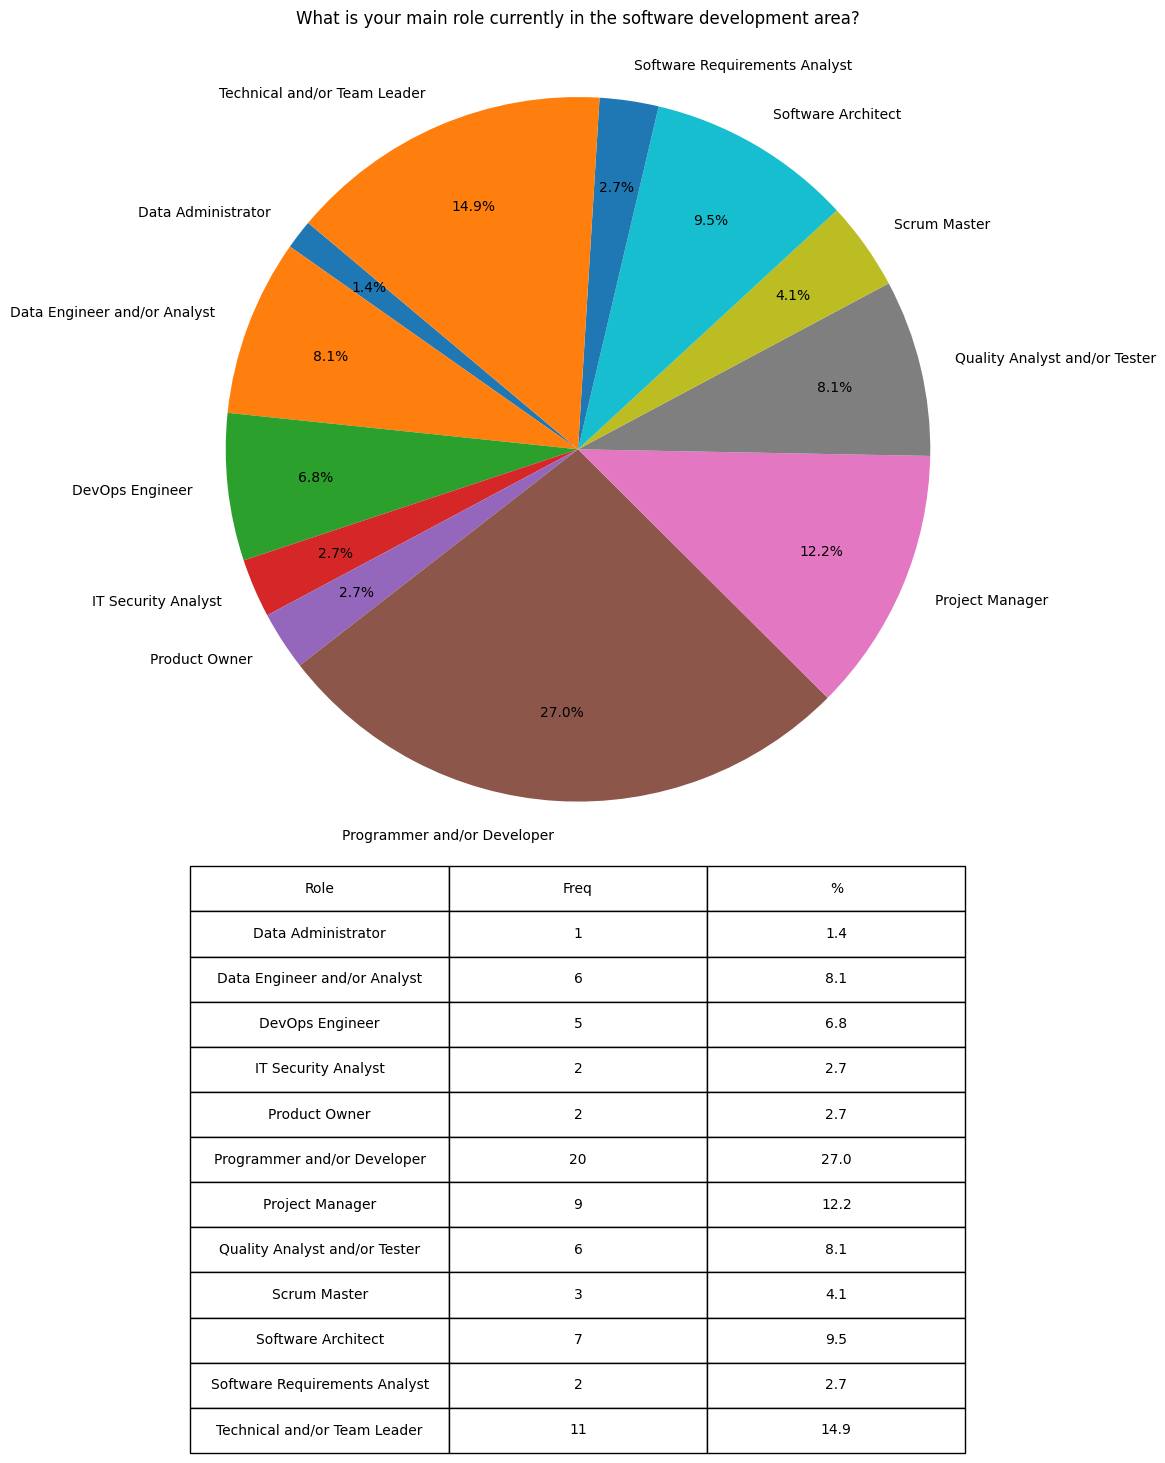

In [22]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = perfil_sts['qtde']
labels = perfil_sts['perfil']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('What is your main role currently in the software development area?')

# Adjusting the position and size of the table
table_data = perfil_sts[['perfil', 'qtde', 'pct']]
table_data.rename(columns={"perfil": "Role", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

In [23]:
# Creating the LaTeX table using the `tabulate` package
latex_table_q4 = tabulate(perfil_sts, floatfmt=".1f", tablefmt="latex", showindex="False")

# Printing the LaTeX table
print(latex_table_q4)

\begin{tabular}{lrr}
\hline
 Data Administrator            &  1 &  1.4 \\
 Data Engineer and/or Analyst  &  6 &  8.1 \\
 DevOps Engineer               &  5 &  6.8 \\
 IT Security Analyst           &  2 &  2.7 \\
 Product Owner                 &  2 &  2.7 \\
 Programmer and/or Developer   & 20 & 27.0 \\
 Project Manager               &  9 & 12.2 \\
 Quality Analyst and/or Tester &  6 &  8.1 \\
 Scrum Master                  &  3 &  4.1 \\
 Software Architect            &  7 &  9.5 \\
 Software Requirements Analyst &  2 &  2.7 \\
 Technical and/or Team Leader  & 11 & 14.9 \\
\hline
\end{tabular}


### Q5 - How many years of experience do you have working in software development?
- Less than 1 year
- Between 1 and 3 years
- Between 4 and 6 years
- Between 7 and 9 years
- Between 10 and 12 years
- Between 13 and 15 years
- Over 15 years

In [24]:
experiencia_sts = df["5. Quantos anos de experiência você tem trabalhando em desenvolvimento de software?"].value_counts().to_frame()

# Resetting the index to convert the index to a column and renaming columns
experiencia_sts = experiencia_sts.reset_index(drop=False)
experiencia_sts = experiencia_sts.rename(columns={'index': 'experiencia'})
experiencia_sts.rename(columns={'5. Quantos anos de experiência você tem trabalhando em desenvolvimento de software?': 'qtde'}, inplace=True)

# Creating a dictionary to map experience levels to numerical values
mapping_dict = {'Menos de 1 ano': 1,
                'Entre 1 e 3 anos': 2,
                'Entre 4 e 6 anos': 3,
                'Entre 7 e 9 anos': 4,
                'Entre 10 e 12 anos': 5,
                'Entre 13 e 15 anos': 6,
                'Mais de 15 anos': 7}

# Creating a new column 'ord_experiencia' based on the mapping dictionary for sorting
experiencia_sts['ord_experiencia'] = experiencia_sts['experiencia'].map(mapping_dict)

# Sorting the DataFrame by 'ord_experiencia' in ascending order and dropping the column
experiencia_sts = experiencia_sts.sort_values(by='ord_experiencia', ascending=True)
experiencia_sts.drop('ord_experiencia', axis=1, inplace=True)
experiencia_sts = experiencia_sts.reset_index(drop=True)

# Calculating the percentage of each experience level
experiencia_sts['pct'] = ((experiencia_sts['qtde'] / df.shape[0]) * 100).round(1)

# Replacing long experience level descriptions with shorter ones for clarity
experiencia_sts['experiencia'] = experiencia_sts['experiencia'].replace(["Menos de 1 ano",
                                                                         "Entre 1 e 3 anos",
                                                                         "Entre 4 e 6 anos",
                                                                         "Entre 7 e 9 anos",
                                                                         "Entre 10 e 12 anos",
                                                                         "Entre 13 e 15 anos",
                                                                         "Mais de 15 anos"],
                                                                        ["< 1",
                                                                         "1 - 3",
                                                                         "4 - 6",
                                                                         "7 - 9",
                                                                         "10 - 12",
                                                                         "13 - 15",
                                                                         "> 15"])

#experiencia_sts

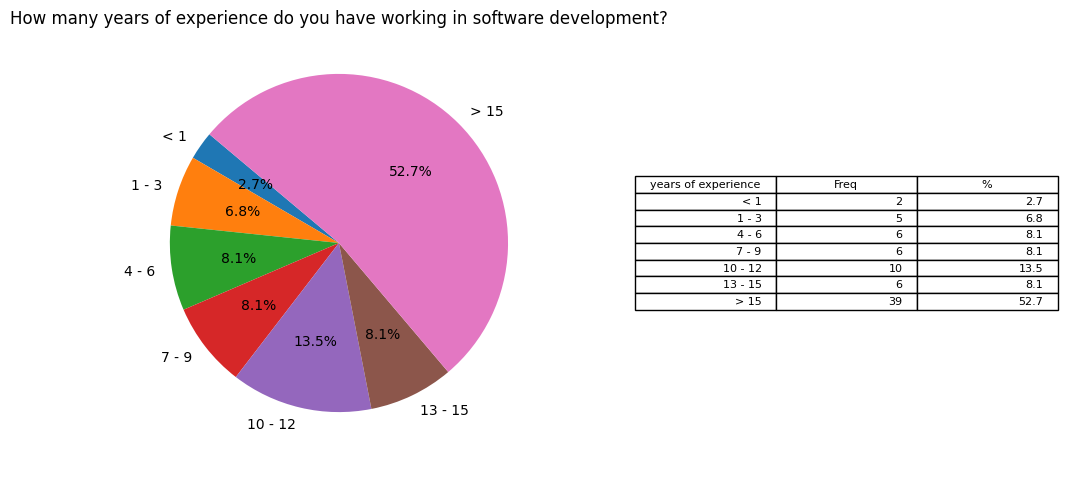

In [25]:
# DataFrame data from idade_sts
labels = experiencia_sts['experiencia']
sizes = experiencia_sts['qtde']

# Creating the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('How many years of experience do you have working in software development?')

# Table
table_data = experiencia_sts[['experiencia', 'qtde', 'pct']]
table_data.rename(columns={"experiencia": "years of experience", "qtde": "Freq", "pct": "%"}, inplace=True)
ax2.axis('off')  # Hides the borders of the table
ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')

plt.show()

In [26]:
# Creating the LaTeX table using the `tabulate` package
tabela_latex_q5 = tabulate(experiencia_sts, floatfmt=".1f", tablefmt="latex", showindex="False")

# Printing the LaTeX table
print(tabela_latex_q5)

\begin{tabular}{lrr}
\hline
 \ensuremath{<} 1     &  2 &  2.7 \\
 1 - 3   &  5 &  6.8 \\
 4 - 6   &  6 &  8.1 \\
 7 - 9   &  6 &  8.1 \\
 10 - 12 & 10 & 13.5 \\
 13 - 15 &  6 &  8.1 \\
 \ensuremath{>} 15    & 39 & 52.7 \\
\hline
\end{tabular}


## RQ1 - What is the level of knowledge of Brazilian software developers about basic data privacy concepts?

### Q6 - What is your level of knowledge about data privacy?
- No Knowledge
- Basic Awareness (I have a general idea of what data privacy is)
- Basic Knowledge (I understand the basic principles and rights of data subjects)
- Intermediate Knowledge (I can explain the main concepts and how to apply them in common situations)
- Comprehensive Knowledge (I have a good understanding of the topic, including data privacy laws and regulations)

In [27]:
# Calling the function to process the column '6. Qual seu nível de conhecimento sobre privacidade de dados?'
result_q06 = process_level_knowledge_column(df, "6. Qual seu nível de conhecimento sobre privacidade de dados?")

# Displaying the result
#result_q06

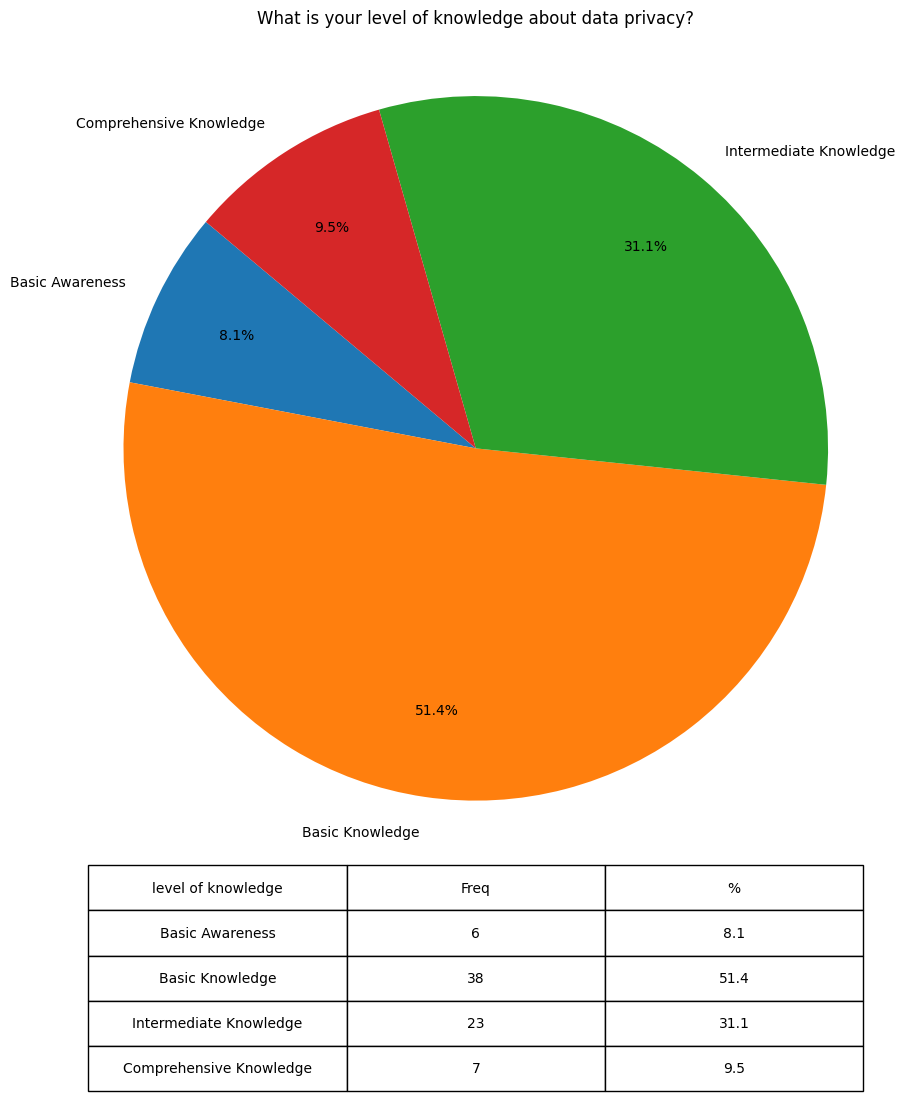

In [28]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = result_q06['qtde']
labels = result_q06['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('What is your level of knowledge about data privacy?')

# Adjusting the position and size of the table
table_data = result_q06[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "level of knowledge", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q7  - Have you ever attended training or courses on data privacy?
- I have never participated
- I have participated in an introductory training
- I have participated in a basic course
- I have participated in an intermediate course
- I have participated in an advanced or specialization training

In [29]:
capacitacao_sts = df["7. Você já participou de treinamentos ou cursos sobre privacidade de dados? "].value_counts().to_frame()
capacitacao_sts = capacitacao_sts.reset_index(drop=False)
capacitacao_sts = capacitacao_sts.rename(columns={'index': 'capacitacao_privacidade'})
capacitacao_sts.rename(columns={'7. Você já participou de treinamentos ou cursos sobre privacidade de dados? ': 'qtde'}, inplace=True)

# Dicionário de tradução
translation_dict = {
    'Nunca participei': 'Never',
    'Participei de um treinamento introdutório': 'Introductory training',
    'Participei de um curso básico': 'Basic course',
    'Participei de um curso intermediário': 'Intermediate course',
    'Participei de um treinamento avançado ou especialização': 'Advanced training or specialization'
}

# Atualizando a coluna com os valores traduzidos
capacitacao_sts['capacitacao_privacidade'] = capacitacao_sts['capacitacao_privacidade'].map(translation_dict)



# Criando um dicionário para mapear os níveis de conhecimento para valores numéricos
dicionario_mapeamento = {'Never': 1,
                         'Introductory training': 2,
                         'Basic course': 3,
                         'Intermediate course': 4,
                         'Advanced training or specialization':5}

# Criando a nova coluna 'ord_conhecimento'
capacitacao_sts['ord_capacitacao'] = capacitacao_sts['capacitacao_privacidade'].map(dicionario_mapeamento)

capacitacao_sts = capacitacao_sts.sort_values(by='ord_capacitacao', ascending=True)
capacitacao_sts.drop('ord_capacitacao', axis=1, inplace=True)
capacitacao_sts = capacitacao_sts.reset_index(drop=True)

capacitacao_sts['pct'] = ((capacitacao_sts['qtde']/df.shape[0])*100).round(1)

#capacitacao_sts

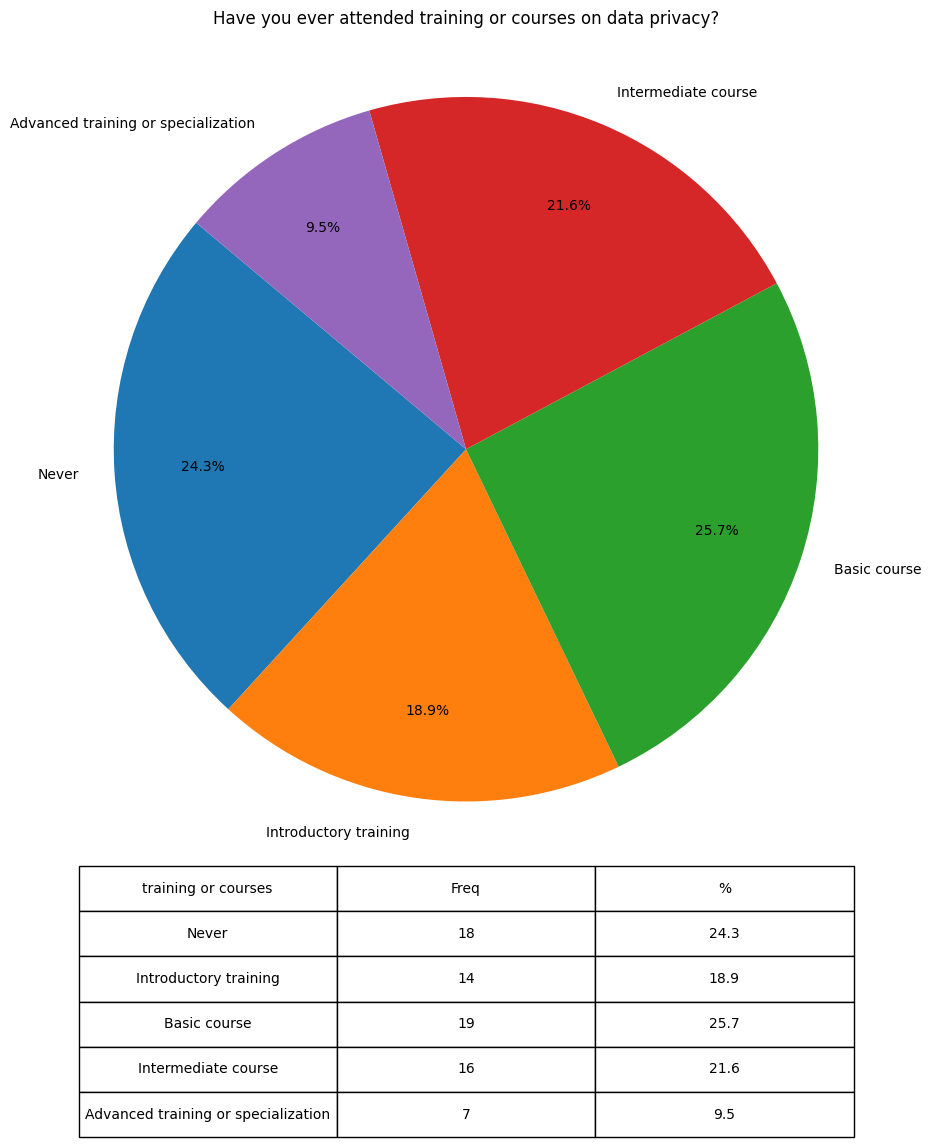

In [30]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = capacitacao_sts['qtde']
labels = capacitacao_sts['capacitacao_privacidade']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('Have you ever attended training or courses on data privacy?')

# Adjusting the position and size of the table
table_data = capacitacao_sts[['capacitacao_privacidade', 'qtde', 'pct']]
table_data.rename(columns={"capacitacao_privacidade": "training or courses", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q8 - What is your main source of information about data privacy?
- Courses
- Internet
- Books
- Magazines and articles
- Events and workshops
- Organizations and associations
- Specialized consultancies
- Contact with experts
- Legislative updates
- Other

In [31]:
fonteinformacao_sts = df["8. Qual sua principal fonte de informação sobre privacidade de dados? "].value_counts().to_frame()
fonteinformacao_sts = fonteinformacao_sts.reset_index(drop=False)
fonteinformacao_sts = fonteinformacao_sts.rename(columns={'index': 'fonte_informacao'})
fonteinformacao_sts.rename(columns={'8. Qual sua principal fonte de informação sobre privacidade de dados? ': 'qtde'}, inplace=True)

# Dicionário de tradução
translation_dict = {
    'Internet':'Internet',
    'Cursos': 'Courses',
    'Contato com especialistas': 'Contact with experts',
    'Revistas e artigos': 'Magazines and articles',
    'Organizações e associações': 'Organizations and associations',
    'Eventos e workshops': 'Advanced training or specialization',
    'Atualizações legislativas':'Events and workshops',
    'Várias fontes: portal da ANPD, autoridades de outros países, leis, livros e eventos.':'Multiple sources',
    'Livros':'Books'
}
# Atualizando a coluna com os valores traduzidos
fonteinformacao_sts['fonte_informacao'] = fonteinformacao_sts['fonte_informacao'].map(translation_dict)

fonteinformacao_sts = fonteinformacao_sts.sort_values(by='fonte_informacao', ascending=True)
fonteinformacao_sts = fonteinformacao_sts.reset_index(drop=True)
fonteinformacao_sts['pct'] = ((fonteinformacao_sts['qtde']/df.shape[0])*100).round(1)

#fonteinformacao_sts

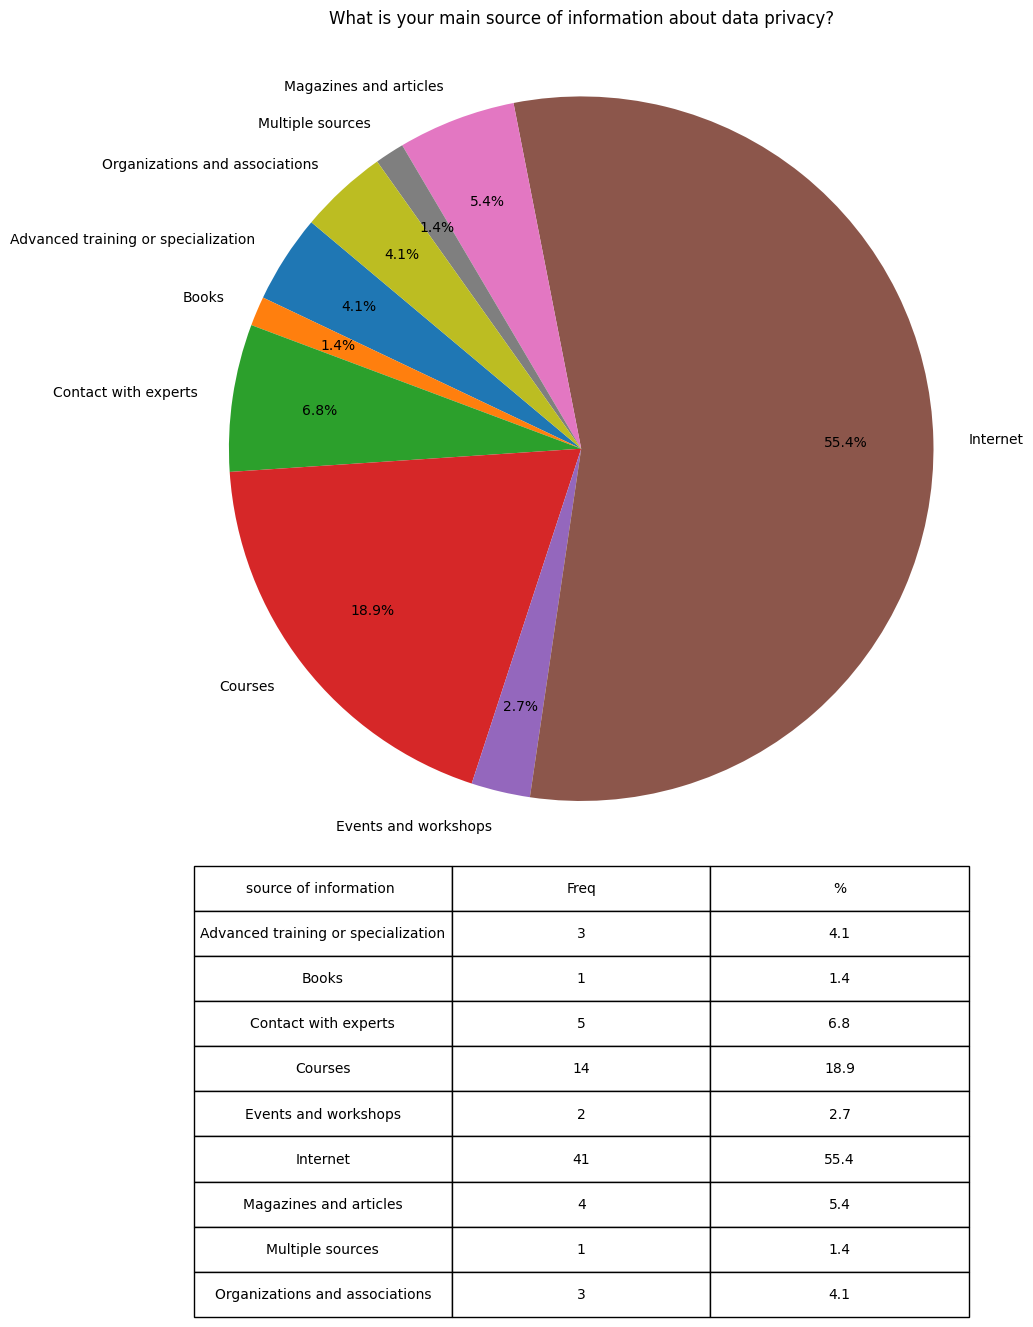

In [32]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = fonteinformacao_sts['qtde']
labels = fonteinformacao_sts['fonte_informacao']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('What is your main source of information about data privacy?')

# Adjusting the position and size of the table
table_data = fonteinformacao_sts[['fonte_informacao', 'qtde', 'pct']]
table_data.rename(columns={"fonte_informacao": "source of information ", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q9 - What is your level of knowledge about the Brazilian General Data Protection Law (LGPD)?
- No knowledge
- Basic Awareness	 (I have a general idea of the principles and rights)
- Basic knowledge (I understand the main points of the law and how to apply them in simple situations)
- Intermediate Knowledge (I can explain the details of the law, including business obligations and data subject rights)
- Comprehensive Knowledge (I have a command of the subject and in-depth knowledge of the legal implications of the LGPD)

In [33]:
result_q09 = process_level_knowledge_column(df, "9.  Qual seu nível de conhecimento sobre a Lei Geral de Proteção de Dados (LGPD)? ")
#result_q09

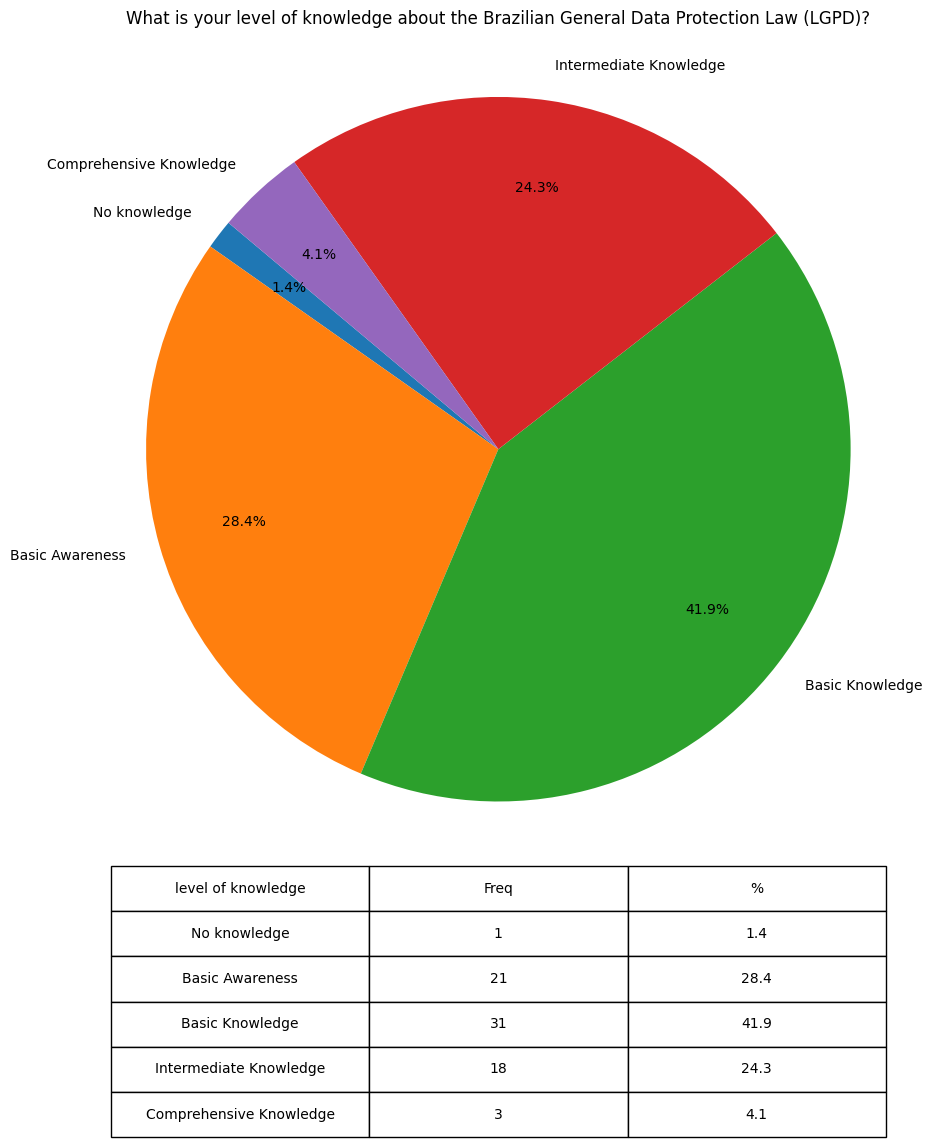

In [34]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = result_q09['qtde']
labels = result_q09['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('What is your level of knowledge about the Brazilian General Data Protection Law (LGPD)?')

# Adjusting the position and size of the table
table_data = result_q09[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "level of knowledge", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q10 - What is your level of knowledge about the principles of the Brazilian General Data Protection Law (LGPD)?
- No knowledge
- Basic Awareness (I have a general idea of ​​the principles, but need more information)
- Basic knowledge (I understand the main principles and how they apply in simple situations)
- Intermediate Knowledge (I can explain the principles in detail and with examples, including how to identify violations of the LGPD)
- Comprehensive Knowledge (I have mastery of the subject and can explain all the principles of the LGPD in depth, including their legal implications)

In [35]:
result_q10 = process_level_knowledge_column(df, "10. Qual seu nível de conhecimento sobre os princípios da Lei Geral de Proteção de Dados (LGPD)? ")
#result_q10

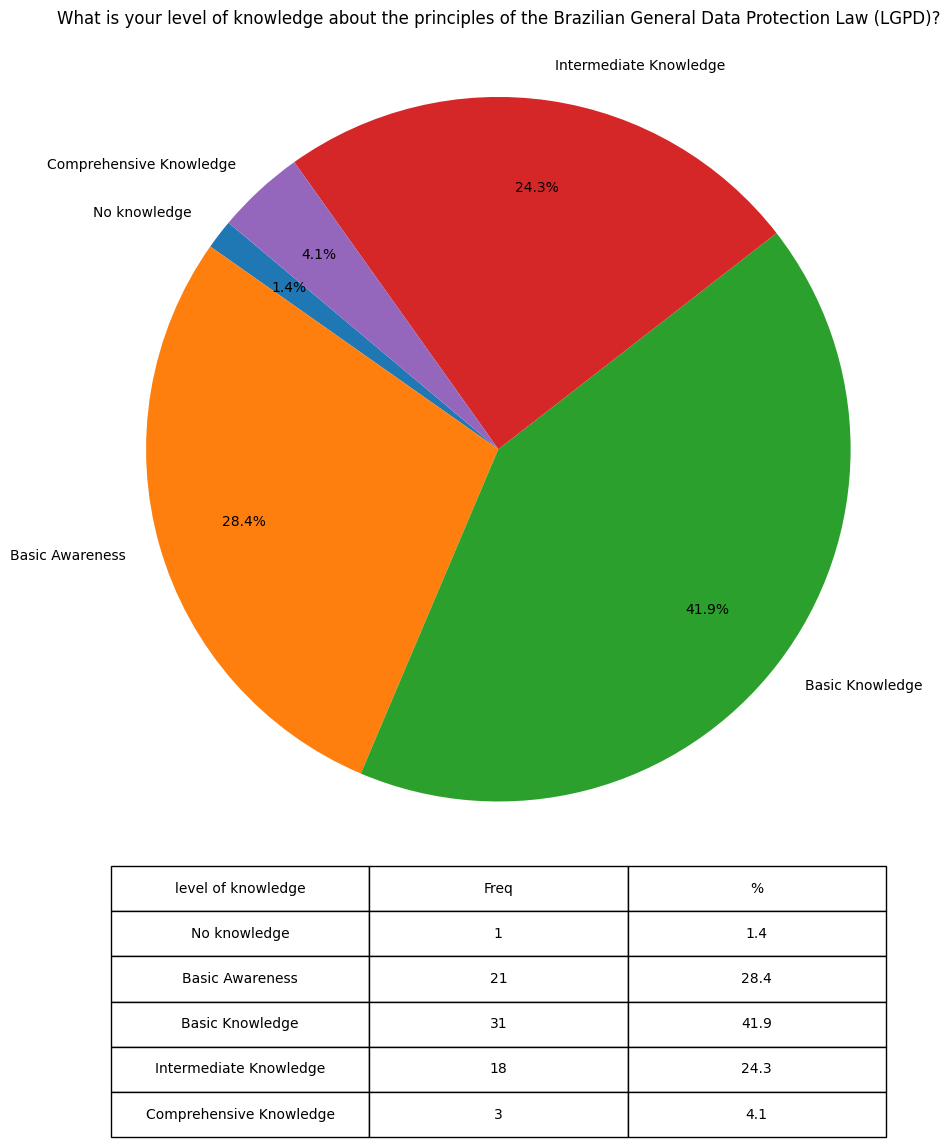

In [36]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = result_q09['qtde']
labels = result_q09['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('What is your level of knowledge about the principles of the Brazilian General Data Protection Law (LGPD)?')

# Adjusting the position and size of the table
table_data = result_q09[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "level of knowledge", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q11 - What are the main principles of the LGPD that you know?
- None
- Purpose
- Adequacy
- Need
- Open Access
- Data Quality
- Transparency
- Security
- Prevention
- Non-Discrimination
- Accountability

In [37]:
column_name = "11. Quais são os principais princípios da LGPD que você conhece? (Marque todas as opções que se aplicam)"
result_q11 = process_multiple_option_column(df, column_name)

# Dicionário de tradução
translation_dict = {
    'Finalidade':'Purpose',
    'Adequação': 'Adequacy',
    'Necessidade': 'Need',
    'Livre Acesso': 'Open Access',
    'Qualidade dos Dados': 'Data Quality',
    'Transparência': 'Transparency',
    'Segurança': 'Security',
    'Prevenção': 'Prevention',
    'Não Descriminação': 'Non-Discrimination',
    'Responsabilização e prestação de contas': 'Accountability',
    'Nenhum': 'None'
}
# Atualizando a coluna com os valores traduzidos
result_q11['answer'] = result_q11['answer'].map(translation_dict)

result_q11 = result_q11.sort_values(by='answer', ascending=True)
result_q11 = result_q11.reset_index(drop=True)

#result_q11

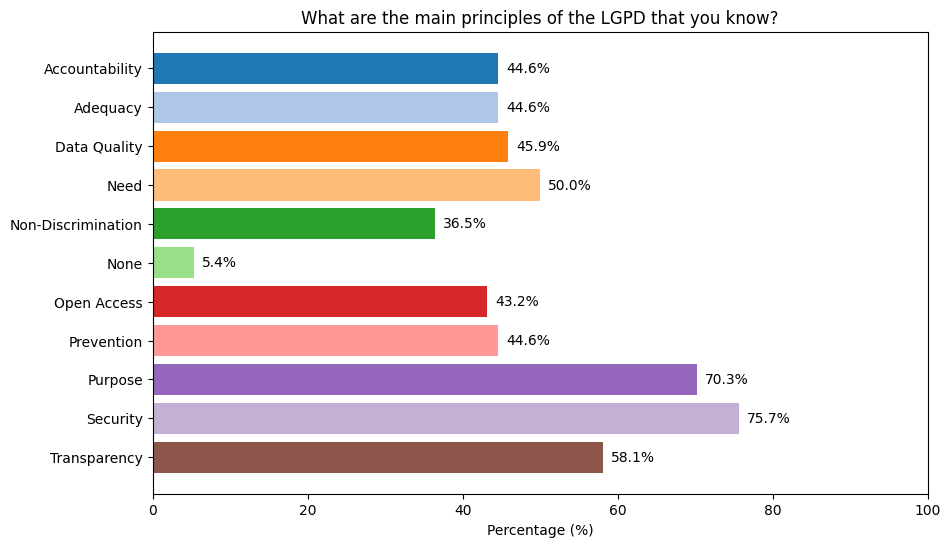

,LGPD principles,Freq,%
0,Accountability,33,44.6
1,Adequacy,33,44.6
2,Data Quality,34,45.9
3,Need,37,50.0
4,Non-Discrimination,27,36.5
5,None,4,5.4
6,Open Access,32,43.2
7,Prevention,33,44.6
8,Purpose,52,70.3
9,Security,56,75.7


In [38]:
# Defining a color palette with different colors for each bar
colors = plt.cm.tab20(range(len(result_q11)))

# Plotting horizontal bar chart with percentage values and different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(result_q11['answer'], result_q11['pct'], color=colors)

# Adding percentage values on the bars
for bar, pct in zip(bars, result_q11['pct']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{pct}%', ha='left', va='center', fontsize=10)

plt.xlabel('Percentage (%)')
plt.title('What are the main principles of the LGPD that you know?')
plt.xlim(0, 100)  # Setting the x-axis limit from 0 to 100
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()

## Displaying table with qtde and pct values
table_data = result_q11[['answer', 'qtde', 'pct']]
table_data.rename(columns={"answer": "LGPD principles", "qtde": "Freq", "pct": "%"}, inplace=True)
table_data

### Q12 - Which of the following LGPD data protection concepts are you familiar with?
- Personal data
- Sensitive personal data
- Processing of personal data
- Processing of sensitive personal data
- Anonymization and/or pseudonymization of personal data
- Agents processing personal data
- Consent of the data subject
- Rights of the data subject (e.g. access, correction, deletion)
- Accountability and compensation for damages
- Penalties for non-compliance with the LGPD
- Other

In [39]:
column_name = "12. Quais dos seguintes conceitos de proteção de dados da LGPD você está familiarizado? (Marque todas as opções que se aplicam)"
result_q12 = process_multiple_option_column(df, column_name)

# Dicionário de tradução
translation_dict = {
    'Dados pessoais':'Personal data',
    'Dados pessoais sensíveis':'Sensitive personal data',
    'Tratamento de dados pessoais':'Processing of personal data',
    'Tratamento de dados pessoais sensíveis':'Processing of sensitive personal data',
    'Anonimização e/ou pseudonimização de dados pessoais':'Anonymization and/or pseudonymization of personal data',
    'Agentes de tratamento de dados pessoais':'Agents processing personal data',
    'Consentimento do titular dos dados':'Consent of the data subject',
    'Direitos do titular dos dados (ex: acesso, correção, exclusão)':'Rights of the data subject (e.g. access, correction, deletion)',
    'Responsabilização e ressarcimento de danos':'Accountability and compensation for damages',
    'Sanções por descumprimento da LGPD':'Penalties for non-compliance with the LGPD',
    'Controles de proteção, riscos, transparência, cláusulas contratuais, transferência internacional e privacy enhance technology':'Other'
}
# Atualizando a coluna com os valores traduzidos
result_q12['answer'] = result_q12['answer'].map(translation_dict)

result_q12 = result_q12.sort_values(by='answer', ascending=True)
result_q12 = result_q12.reset_index(drop=True)


#result_q12

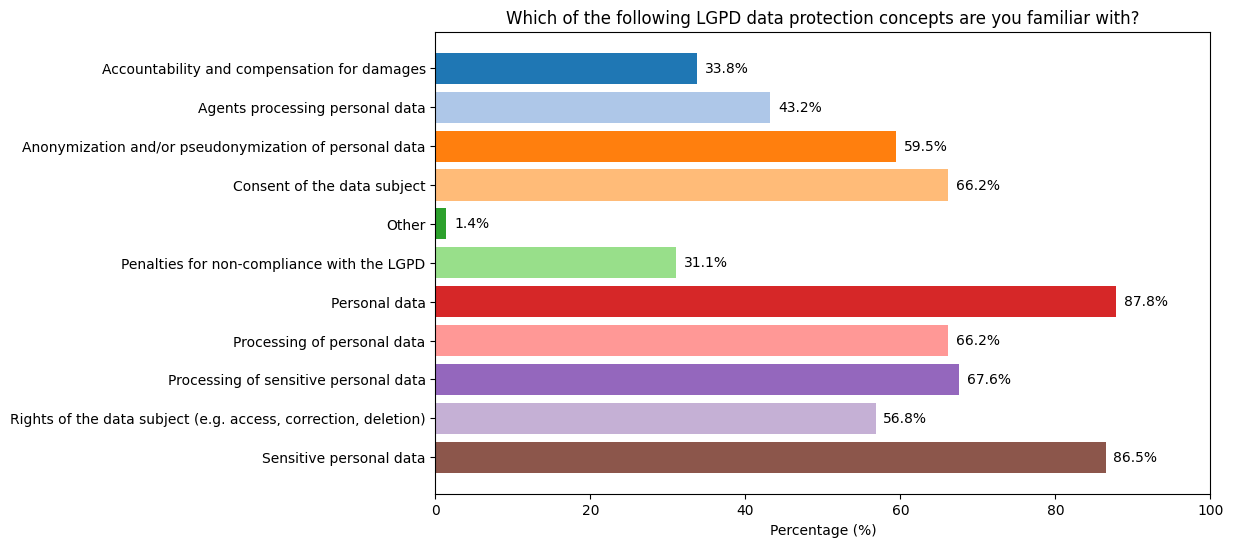

,LGPD data protection concepts,Freq,%
0,Accountability and compensation for damages,25,33.8
1,Agents processing personal data,32,43.2
2,Anonymization and/or pseudonymization of personal data,44,59.5
3,Consent of the data subject,49,66.2
4,Other,1,1.4
5,Penalties for non-compliance with the LGPD,23,31.1
6,Personal data,65,87.8
7,Processing of personal data,49,66.2
8,Processing of sensitive personal data,50,67.6
9,"Rights of the data subject (e.g. access, correction, deletion)",42,56.8


In [40]:
# Defining a color palette with different colors for each bar
colors = plt.cm.tab20(range(len(result_q12)))

# Plotting horizontal bar chart with percentage values and different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(result_q12['answer'], result_q12['pct'], color=colors)

# Adding percentage values on the bars
for bar, pct in zip(bars, result_q12['pct']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{pct}%', ha='left', va='center', fontsize=10)

plt.xlabel('Percentage (%)')
plt.title('Which of the following LGPD data protection concepts are you familiar with?')
plt.xlim(0, 100)  # Setting the x-axis limit from 0 to 100
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()

## Displaying table with qtde and pct values
table_data = result_q12[['answer', 'qtde', 'pct']]
table_data.rename(columns={"answer": "LGPD data protection concepts", "qtde": "Freq", "pct": "%"}, inplace=True)
table_data

### Q13 - What is your level of knowledge about the differences between personal data and sensitive data?
- No knowledge
- Basic Awareness (I have a general idea, but need more information)
- Basic knowledge (I understand the main concepts and some differences)
- Intermediate Knowledge	 (I can explain the differences with examples and apply the knowledge in simple situations)
- Comprehensive Knowledge (I have mastered the topic and can explain the differences in detail, including legal implications)

In [41]:
result_q13 = process_level_knowledge_column(df, "13. Qual o seu nível de conhecimento sobre as diferenças entre dados pessoais e dados sensíveis? ")
#result_q13

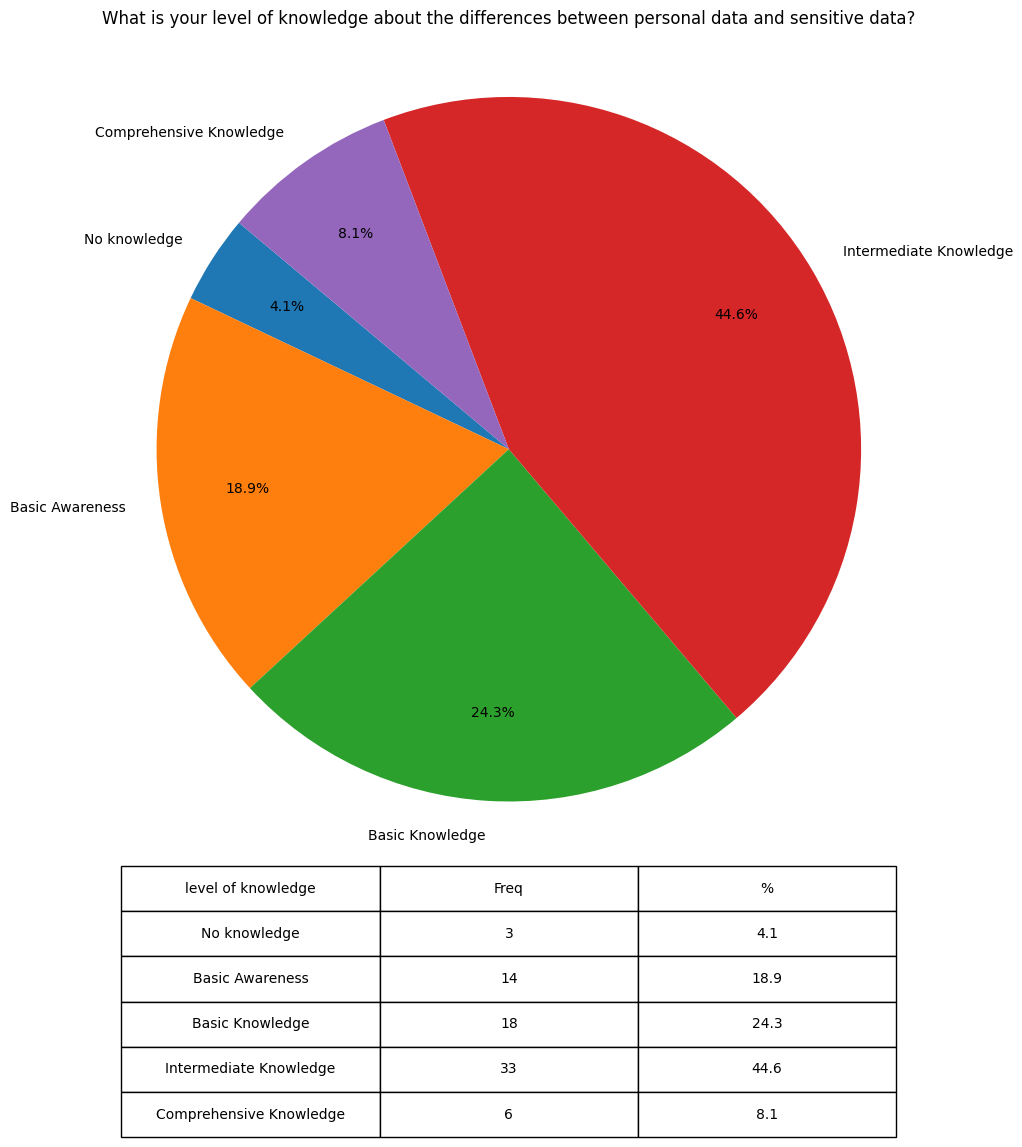

In [42]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = result_q13['qtde']
labels = result_q13['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('What is your level of knowledge about the differences between personal data and sensitive data?')

# Adjusting the position and size of the table
table_data = result_q13[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "level of knowledge", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q14 - What is your level of knowledge about data subject rights under the LGPD?
- No knowledge
- Basic Awareness (I have a general idea of ​​the rights, but need more information)
- Basic knowledge (I understand the main rights and how to exercise them in simple situations)
- Intermediate Knowledge (I can explain the rights in detail and with examples, including how to request access to my data)
- Comprehensive Knowledge (I have mastered the subject and can explain all the rights of data subjects, including how to appeal in case of violations)

In [43]:
result_q14 = process_level_knowledge_column(df, "14. Qual o seu nível de conhecimento sobre os direitos dos titulares de dados sob a LGPD?")
#result_q14

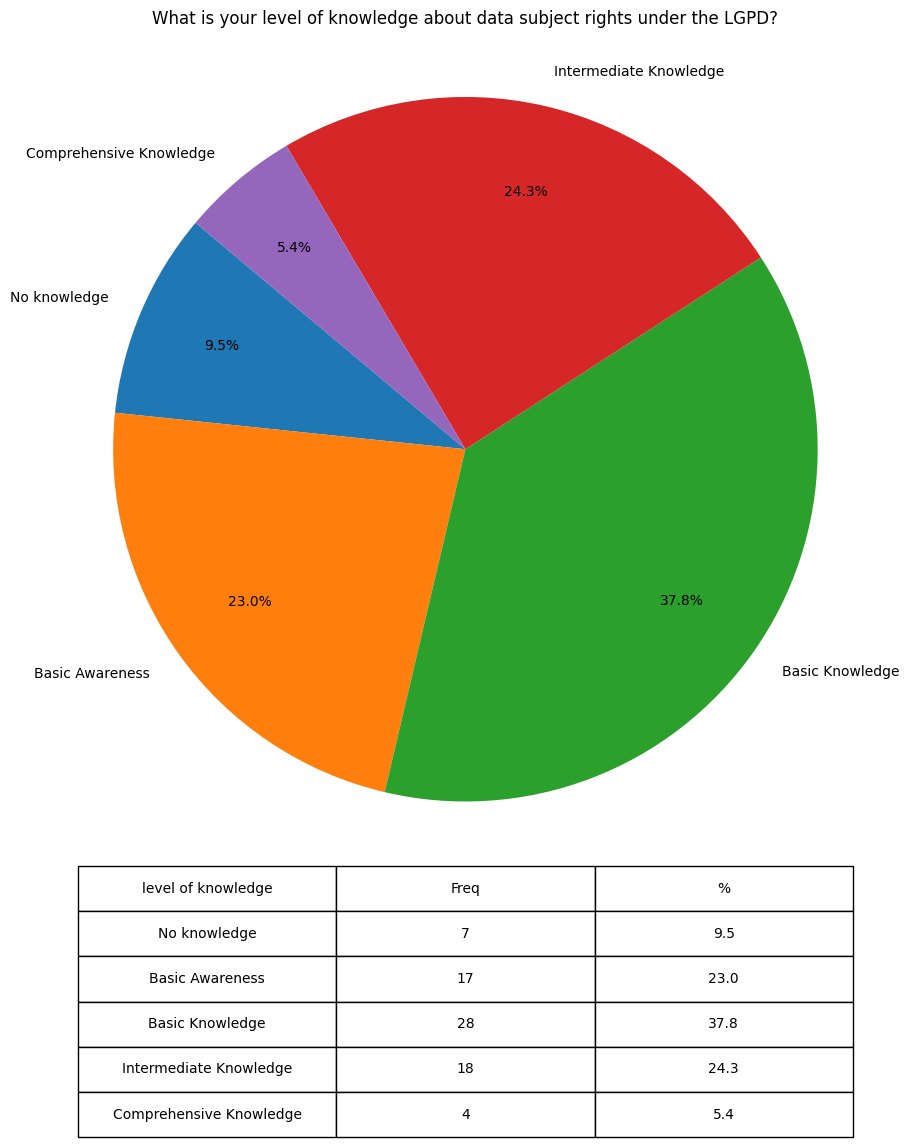

In [44]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = result_q14['qtde']
labels = result_q14['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('What is your level of knowledge about data subject rights under the LGPD?')

# Adjusting the position and size of the table
table_data = result_q14[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "level of knowledge", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q15 - How would you ensure data privacy in a software system?
Open question

In [45]:
# Creating a DataFrame with a specific column related to data privacy
df_filtered = df['15. Como você garantiria a privacidade de dados em um sistema de software?'].to_frame()

# Dropping rows with missing values in the specified column
df_filtered = df_filtered.dropna(subset=['15. Como você garantiria a privacidade de dados em um sistema de software?'])

# Resetting the index of the DataFrame after dropping rows
df_filtered = df_filtered.reset_index(drop=True)

# Renaming the column to its translated English equivalent
df_filtered = df_filtered.rename(columns={'15. Como você garantiria a privacidade de dados em um sistema de software?': 
                        '15. How would you ensure data privacy in a software system?'})

df_filtered

,15. How would you ensure data privacy in a software system?
0,"Aplicação do privacy by design com implementação dos controles necessários, relatório de impacto à proteção de dados no início do projeto, transparência e uso de PETs (privacy enhance technologies)."
1,"Uso de provedor seguro, criptografia de dados em trânsito e armazenados e atualizações de infraestrutura e softwares."
2,criptografia assimétrica
3,Com criptografia
4,Realizando o controle em conformidade com o consentimento do proprietário dos dados pessoais.
5,"Identificação e categorização dos dados, sistemas de controle de acesso com diferentes níveis de hierarquia , sistemas de proteção e prevenção a invasão, não manter dados desnecessários para o negocio, Anonimização de dados quando possível, termo de utilização e responsabilização para os usuários."
6,Segurança reforçada nos dados armazenados.
7,-
8,Não compartilhando ou deixando visível informações pessoais sem o consentimento do dono.
9,"Existem várias formas com usos de rede interna, criptografias de ponta a ponta, educando os times sobre a importância da privacidade dos dados, nunca logar dados sensíveis nas aplicações e etc..."


## RQ2 - What is the level of knowledge of Brazilian software developers about LLMs?


### Q16 - How would you rate your knowledge of LLMs?
- No knowledge
- Basic (I have a general idea)
- Intermediate (I understand the basic operation)
- Advanced (I have knowledge of applications and implications)
- Expert (I have mastery of the subject and in-depth technical knowledge)

In [46]:
# Counting the occurrences of each education level in the specified column and converting to a DataFrame
question_sts = df["16. Como você classificaria seu conhecimento sobre LLMs? "].value_counts().to_frame()

# Resetting the index to convert the index to a column and renaming columns
question_sts = question_sts.reset_index(drop=False)
question_sts = question_sts.rename(columns={'index': 'question_anwser'})

# Splitting the 'question_anwser' column to remove any text in parentheses and stripping spaces
question_sts["question_anwser"] = question_sts["question_anwser"].str.split('(', expand=True)[0].str.strip()

# Creating a dictionary to map education levels to numerical values
mapping_dict = {'Sem conhecimento': 1,
                'Básico': 2,
                'Intermediário': 3,
                'Avançado': 4,
                'Especialista': 5}

# Creating a new column 'ord_escolaridade' based on the mapping dictionary for sorting purposes
question_sts['ord_question_anwser'] = question_sts['question_anwser'].map(mapping_dict)

# Sorting the DataFrame by 'ord_escolaridade' in ascending order and dropping the column
question_sts = question_sts.sort_values(by='ord_question_anwser', ascending=True)
question_sts.drop('ord_question_anwser', axis=1, inplace=True)
question_sts = question_sts.reset_index(drop=True)

# Renaming the column '3. Qual seu nível de escolaridade?' to 'qtde' and calculating the percentage
question_sts.rename(columns={'16. Como você classificaria seu conhecimento sobre LLMs? ': 'qtde'}, inplace=True)
question_sts['pct'] = ((question_sts['qtde']/df.shape[0])*100).round(1)

# Dicionário de tradução
translation_dict = {
    'Sem conhecimento':'No knowledge',
    'Básico':'Basic',
    'Intermediário':'Intermediate',
    'Avançado':'Advanced',
    'Especialista':'Expert'
    }
# Atualizando a coluna com os valores traduzidos
question_sts['question_anwser'] = question_sts['question_anwser'].map(translation_dict)


#question_sts

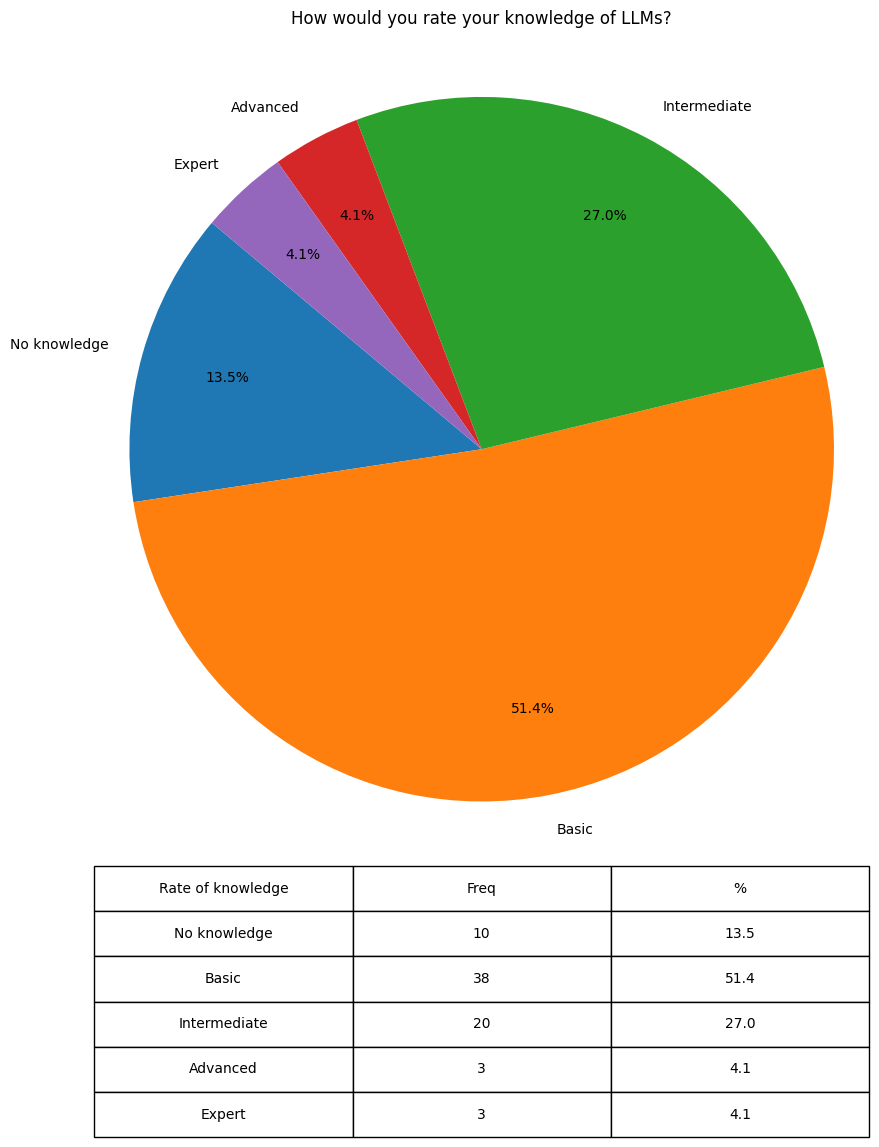

In [47]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = question_sts['qtde']
labels = question_sts['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('How would you rate your knowledge of LLMs?')

# Adjusting the position and size of the table
table_data = question_sts[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "Rate of knowledge", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q17 - Which LLMs have you used or are familiar with?
- GPT by OpenAI
- Gemini by Google
- Orca or Phi-1 by Microsoft
- Llama by Meta
- Falcon by TII UAE
- Mixtral 7B by Mistral AI
- Claude by Anthropic
- StableLM 2 by Stability AI
- Coral by Cohere
- XGen-7B by Salesforce
- Sabiá by Maritaca AI
- BERTimbau by Neuralmind
- Cabrita
- BERTaú by Itaú
- Bloom by BigScience
- Grok by xAI
- Other

In [78]:
column_name = "17. Quais LLMs você já utilizou ou está familiarizado? (Marque todas as opções que se aplicam)"
result_q17 = process_multiple_option_column(df, column_name)

# Dicionário de tradução
translation_dict = {
    'GPT da OpenAI':'GPT by OpenAI',
    'Gemini da Google':'Gemini by Google',
    'Orca ou Phi-1 da Microsoft':'Orca or Phi-1 by Microsoft',
    'Llama da Meta':'Llama by Meta',
    'Falcon da TII UAE':'Falcon by TII UAE',
    'Mixtral 7B da Mistral AI':'Mixtral 7B by Mistral AI',
    'Claude da Anthropic':'Claude by Anthropic',
    'StableLM 2 da Stability AI':'StableLM 2 by Stability AI',
    'Coral da Cohere':'Coral by Cohere',
    'XGen-7B da Salesforce':'XGen-7B by Salesforce',
    'Sabiá da Maritaca AI':'Sabiá by Maritaca AI',
    'BERTimbau da Neuralmind':'BERTimbau by Neuralmind',
    'Cabrita':'Cabrita',
    'BERTaú do Itaú':'BERTaú by Itaú',
    'Bloom da BigScience':'Bloom by BigScience',
    'Grok da xAI':'Grok by xAI',
    'Copilot':'Copilot by Microsoft',
    'Openchat da USP':'Openchat by USP',
    'Copilot da Microsoft':'Copilot by Microsoft',
    'Luzia e POE':'Other',
    '':'Other',
    'Nenhuma':'Other'
}
# Atualizando a coluna com os valores traduzidos
result_q17['answer'] = result_q17['answer'].map(translation_dict)

#result_q17 = result_q17['answer'].value_counts().to_frame()
#result_q17 = result_q17.reset_index(drop=False)
#result_q17 = result_q17.rename(columns={'index': 'question_anwser'})

#result_q17 = result_q17.sort_values(by='answer', ascending=True)
#result_q17 = result_q17.reset_index(drop=True)

result_q17

,answer,qtde,pct
0,GPT by OpenAI,72,97.3
1,Orca or Phi-1 by Microsoft,5,6.8
2,Falcon by TII UAE,3,4.1
3,Gemini by Google,41,55.4
4,Llama by Meta,8,10.8
5,Sabiá by Maritaca AI,3,4.1
6,BERTimbau by Neuralmind,3,4.1
7,Openchat by USP,1,1.4
8,Cabrita,1,1.4
9,StableLM 2 by Stability AI,2,2.7


### Q18 - Have you ever attended training or courses on LLMs?
- I have never participated
- I have participated in an introductory training
- I have participated in a basic course
- I have participated in an intermediate course
- I have participated in an advanced or specialization training

In [60]:
# Counting the occurrences of each education level in the specified column and converting to a DataFrame
q18_sts = df["18. Você já participou de treinamentos ou cursos sobre LLMs? "].value_counts().to_frame()

# Resetting the index to convert the index to a column and renaming columns
q18_sts = q18_sts.reset_index(drop=False)
q18_sts = q18_sts.rename(columns={'index': 'question_anwser'})


# Creating a dictionary to map education levels to numerical values
mapping_dict = {'Nunca participei': 1,
                'Participei de um treinamento introdutório': 2,
                'Participei de um curso básico': 3,
                'Participei de um curso intermediário': 4,
                'Participei de um treinamento avançado ou especialização': 5}

# Creating a new column 'ord_escolaridade' based on the mapping dictionary for sorting purposes
q18_sts['ord_question_anwser'] = q18_sts['question_anwser'].map(mapping_dict)


# Sorting the DataFrame by 'ord_escolaridade' in ascending order and dropping the column
q18_sts = q18_sts.sort_values(by='ord_question_anwser', ascending=True)
q18_sts.drop('ord_question_anwser', axis=1, inplace=True)
q18_sts = q18_sts.reset_index(drop=True)


# Renaming the column '3. Qual seu nível de escolaridade?' to 'qtde' and calculating the percentage
q18_sts.rename(columns={'18. Você já participou de treinamentos ou cursos sobre LLMs? ': 'qtde'}, inplace=True)
q18_sts['pct'] = ((q18_sts['qtde']/df.shape[0])*100).round(1)

# Dicionário de tradução
translation_dict = {
    'Nunca participei': 'Never participated',
    'Participei de um treinamento introdutório': 'Introductory training',
    'Participei de um curso básico': 'Basic course',
    'Participei de um curso intermediário': 'Intermediate course',
    'Participei de um treinamento avançado ou especialização': 'Advanced or specialization training'
    }
# Atualizando a coluna com os valores traduzidos
q18_sts['question_anwser'] = q18_sts['question_anwser'].map(translation_dict)

#q18_sts

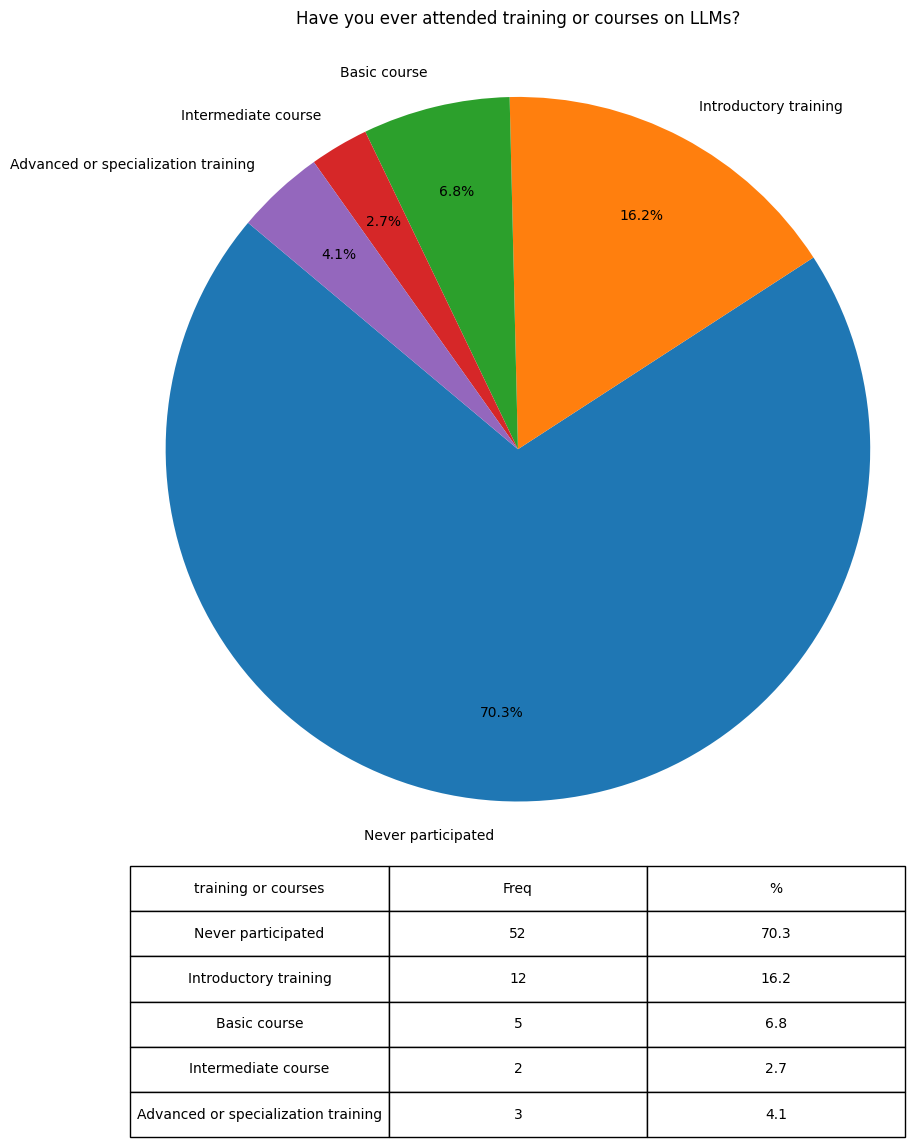

In [59]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = q18_sts['qtde']
labels = q18_sts['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('Have you ever attended training or courses on LLMs?')

# Adjusting the position and size of the table
table_data = q18_sts[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "training or courses", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q19 - How do you use LLMs in your professional activities?
open question

In [48]:
# Creating a DataFrame with a specific column related to data privacy
df_filtered = df['19. Como você utiliza LLMs em suas atividades profissionais?'].to_frame()

# Dropping rows with missing values in the specified column
df_filtered = df_filtered.dropna(subset=['19. Como você utiliza LLMs em suas atividades profissionais?'])

# Resetting the index of the DataFrame after dropping rows
df_filtered = df_filtered.reset_index(drop=True)

# Renaming the column to its translated English equivalent
df_filtered = df_filtered.rename(columns={'19. Como você utiliza LLMs em suas atividades profissionais?': 
                        '15. How do you use LLMs in your professional activities?'})

df_filtered

,15. How do you use LLMs in your professional activities?
0,"Tradução, apoio para analise e apoio na revisão de texto."
1,Não uso
2,"me auxilia com comandos de SO, coisas que não uso com frequência. As vezes é mais efetivo que no google, porém nem sempre é acertivo"
3,Correção de texto
4,Via sites do Copilot ou Chatgpt
5,"Pesquisas, estudos e apoio na construção de soluções"
6,Para ganhar produtividade na pesquisa e para auxiliar na codificação de lógicas de algoritmos.
7,Apenas estudando o que se é possível dentro das aplicações que apoio o desenvolvimento.
8,Apoio na formulação de idéias ou retirada de dúvidas.
9,"Utilizo o copilot que é homologado pela empresa que trabalho, nele normalmente tiro algumas dúvidas comuns que eu tiraria até em um stackoverflow... geração de textos, geração de conteúdos educacionais ajudam muito tbm."


### Q20 - In your opinion, do you have a good understanding of the capabilities and limitations of LLMs?
- No knowledge
- Basic Awareness  (I have a general idea of some of the basic capabilities and limitations of LLMs)
- Basic knowledge (I understand the main capabilities and limitations of LLMs, but I still have questions about some aspects)
- Intermediate Knowledge (I have a good understanding of the capabilities and limitations of LLMs, including their applications and challenges)
- Comprehensive Knowledge (I have mastery of the topic, with in-depth knowledge of the capabilities, limitations and implications of LLMs)

In [56]:
# Counting the occurrences of each education level in the specified column and converting to a DataFrame
q20_sts = df["20. Na sua opinião, você possui um bom entendimento das capacidades e limitações dos LLMs? "].value_counts().to_frame()

# Resetting the index to convert the index to a column and renaming columns
q20_sts = q20_sts.reset_index(drop=False)
q20_sts = q20_sts.rename(columns={'index': 'question_anwser'})

# Splitting the 'question_anwser' column to remove any text in parentheses and stripping spaces
q20_sts["question_anwser"] = q20_sts["question_anwser"].str.split('(', expand=True)[0].str.strip()


# Creating a dictionary to map education levels to numerical values
mapping_dict = {'Não tenho conhecimento': 1,
                'Noções básicas': 2,
                'Conhecimento moderado': 3,
                'Conhecimento bom': 4,
                'Conhecimento completo': 5}

# Creating a new column 'ord_escolaridade' based on the mapping dictionary for sorting purposes
q20_sts['ord_question_anwser'] = q20_sts['question_anwser'].map(mapping_dict)


# Sorting the DataFrame by 'ord_escolaridade' in ascending order and dropping the column
q20_sts = q20_sts.sort_values(by='ord_question_anwser', ascending=True)
q20_sts.drop('ord_question_anwser', axis=1, inplace=True)
q20_sts = q20_sts.reset_index(drop=True)


# Renaming the column '3. Qual seu nível de escolaridade?' to 'qtde' and calculating the percentage
q20_sts.rename(columns={'20. Na sua opinião, você possui um bom entendimento das capacidades e limitações dos LLMs? ': 'qtde'}, inplace=True)
q20_sts['pct'] = ((q20_sts['qtde']/df.shape[0])*100).round(1)

# Dicionário de tradução
translation_dict = {
    'Não tenho conhecimento':'No knowledge',
    'Noções básicas':'Basic Awareness',
    'Conhecimento moderado':'Basic knowledge',
    'Conhecimento bom':'Intermediate Knowledge',
    'Conhecimento completo':'Comprehensive Knowledge'
    }
# Atualizando a coluna com os valores traduzidos
q20_sts['question_anwser'] = q20_sts['question_anwser'].map(translation_dict)

#q20_sts

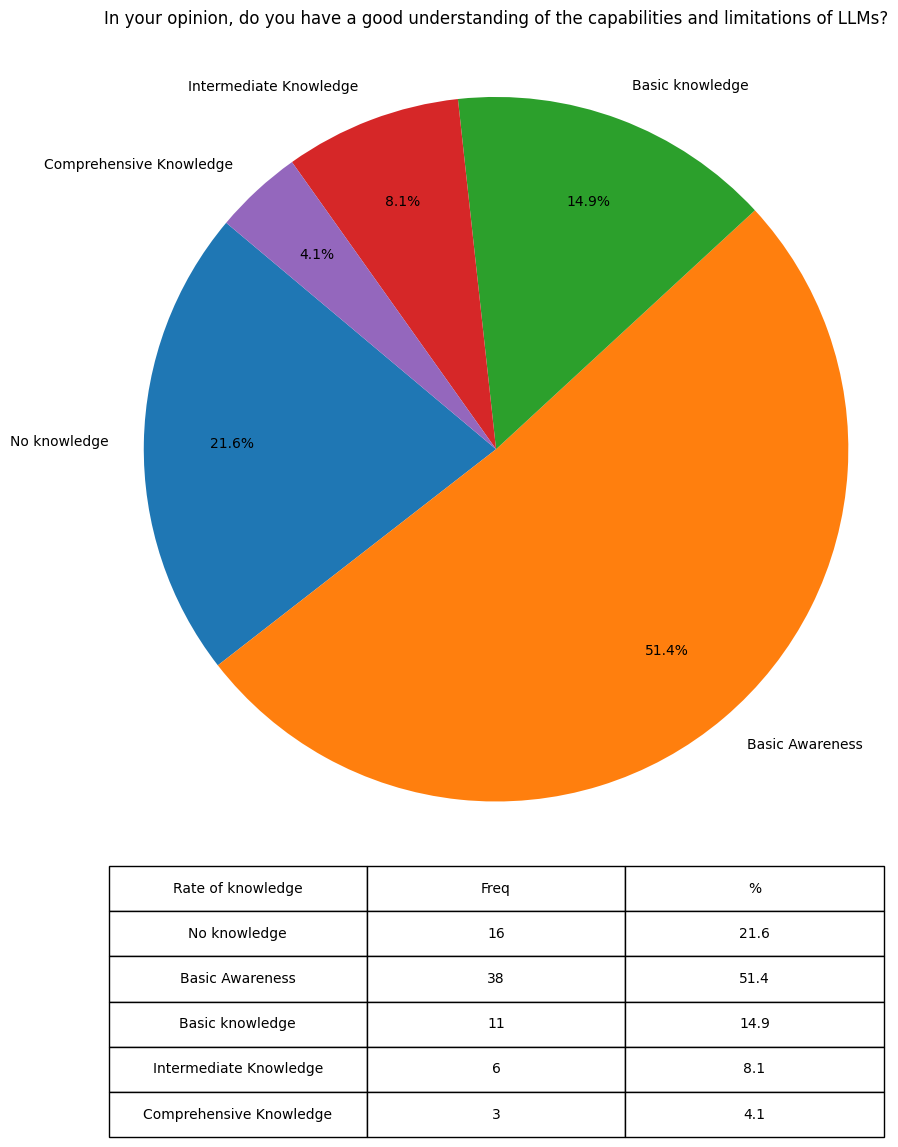

In [55]:
# Creating the pie chart and centered table below
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
sizes = q20_sts['qtde']
labels = q20_sts['question_anwser']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
ax.set_title('In your opinion, do you have a good understanding of the capabilities and limitations of LLMs?')

# Adjusting the position and size of the table
table_data = q20_sts[['question_anwser', 'qtde', 'pct']]
table_data.rename(columns={"question_anwser": "Rate of knowledge", "qtde": "Freq", "pct": "%"}, inplace=True)
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scaling the table size
ax.axis('equal')  # Maintains the aspect ratio of the pie chart

# Adjusting the spacing between the pie chart and the table
fig.subplots_adjust(top=1.5)

plt.show()

### Q21 - Which of the following LLM applications do you know or have used?
- Text generation
- Machine translation
- Question answering
- Text summaries
- Text analysis
- Sentiment analysis
- Chatbots and virtual assistants
- Content creation
- Coding and programming
- Research and data analysis
- Other

In [66]:
column_name = "21. Quais das seguintes aplicações de LLMs você conhece ou já utilizou? (Marque todas as opções que se aplicam)"
result_q21 = process_multiple_option_column(df, column_name)

# Dicionário de tradução
translation_dict = {
    'Geração de texto.':'Text generation',
    'Tradução automática.':'Machine translation',
    'Respostas a perguntas':'Question answering',
    'Resumos de texto.':'Text summaries',
    'Análise de texto':'Text analysis',
    'Análise de sentimento.':'Sentiment analysis',
    'Chatbots e assistentes virtuais':'Chatbots and virtual assistants',
    'Criação de conteúdo':'Content creation',
    'Codificação e programação.':'Coding and programming',
    'Pesquisa e análise de dados':'Research and data analysis',
    'Talvez tradução e chatbots com os quais interagi':'Other'
}
# Atualizando a coluna com os valores traduzidos
result_q21['answer'] = result_q21['answer'].map(translation_dict)

result_q21 = result_q21.sort_values(by='answer', ascending=True)
result_q21 = result_q21.reset_index(drop=True)


#result_q21

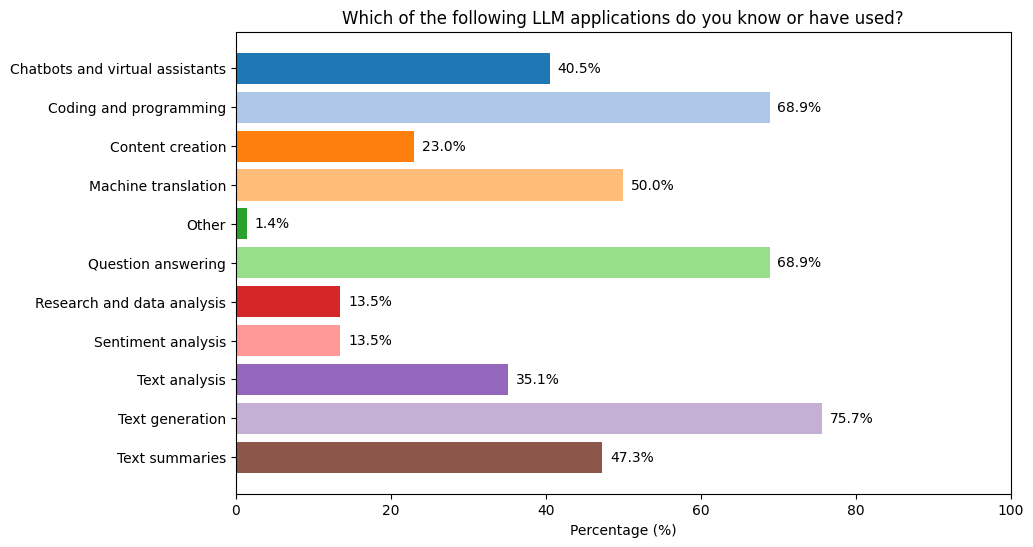

,LGPD data protection concepts,Freq,%
0,Chatbots and virtual assistants,30,40.5
1,Coding and programming,51,68.9
2,Content creation,17,23.0
3,Machine translation,37,50.0
4,Other,1,1.4
5,Question answering,51,68.9
6,Research and data analysis,10,13.5
7,Sentiment analysis,10,13.5
8,Text analysis,26,35.1
9,Text generation,56,75.7


In [65]:
# Defining a color palette with different colors for each bar
colors = plt.cm.tab20(range(len(result_q12)))

# Plotting horizontal bar chart with percentage values and different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(result_q21['answer'], result_q21['pct'], color=colors)

# Adding percentage values on the bars
for bar, pct in zip(bars, result_q21['pct']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{pct}%', ha='left', va='center', fontsize=10)

plt.xlabel('Percentage (%)')
plt.title('Which of the following LLM applications do you know or have used?')
plt.xlim(0, 100)  # Setting the x-axis limit from 0 to 100
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()

## Displaying table with qtde and pct values
table_data = result_q21[['answer', 'qtde', 'pct']]
table_data.rename(columns={"answer": "LGPD data protection concepts", "qtde": "Freq", "pct": "%"}, inplace=True)
table_data

## RQ3 - What is the level of understanding of Brazilian software developers about the data privacy risks associated with the use of LLMs in their professional activities?


## RQ4 - What are the practices and procedures adopted by Brazilian software developers to mitigate data privacy risks when using LLMs in their professional activities?


## RQ5 - What are the challenges faced by Brazilian software developers in ensuring data privacy when using LLMs in their professional activities?


## RQ6 - What are the recommendations for ensuring data privacy when using LLMs?